In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

In [2]:
import s3fs
import time
import boto3
import pyarrow
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import eda as eda
from src import fixdependencia as fixdependencia

In [3]:
bucket = 'inai-summerofdata'
folder = 'parquet'

In [4]:
f = f's3://{bucket}/{folder}/inai_dependencia.parquet'
df = pd.read_parquet(f, engine='pyarrow')
#df = df[df['TIPOSOLICITUD']=='Información Pública']
original = df.copy()
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1


In [5]:
df = original.copy()

In [6]:
df = pd.DataFrame(df)

In [7]:
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1


In [8]:
#eda.CreaTablaConteoPorcentaje(df, nomColumna, booleanNA)

## Conteo de las solicitudes recibidas por año

In [9]:
fechas = df.copy()

In [10]:
mensual = fechas.copy()

In [11]:
mensual ['fechadesolicitud'] = mensual['fechasolicitud']

In [12]:
mensual = mensual.groupby(pd.Grouper(key="fechadesolicitud", freq="1M")).count()

In [13]:
mensual.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
fechadesolicitud,,,,,,,,,,,,,,,,,,,,,
2012-01-31,7127,7127,7127,7127,7127,7127,7127,7127,7127,7127,...,7127,7127,5506,7127,7127,7127,7127,7127,7127,7127
2012-02-29,8131,8131,8131,8131,8131,8131,8131,8131,8131,8131,...,8131,8131,6114,8131,8131,8131,8131,8131,8131,8131
2012-03-31,7922,7922,7922,7922,7922,7922,7922,7922,7922,7922,...,7922,7922,6003,7922,7922,7922,7922,7922,7922,7922
2012-04-30,7426,7426,7426,7426,7426,7426,7426,7426,7426,7426,...,7426,7426,5546,7426,7426,7426,7426,7426,7426,7426
2012-05-31,8621,8621,8621,8621,8621,8621,8621,8621,8621,8621,...,8621,8621,6904,8621,8621,8621,8621,8621,8621,8621


In [14]:
cuenta_tiempos = mensual[['folio','fechasolicitud']]

In [15]:
cuenta_tiempos.head()

,folio,fechasolicitud
fechadesolicitud,,
2012-01-31,7127,7127
2012-02-29,8131,8131
2012-03-31,7922,7922
2012-04-30,7426,7426
2012-05-31,8621,8621


In [16]:
fecha_mensual = cuenta_tiempos.index

In [17]:
fecha_mensual

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
      

In [18]:
cuenta_tiempos.fechasolicitud = fecha_mensual

/home/rafaelortega/Documentos/INAI_consultas/inaivenv/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
cuenta_tiempos.head()

,folio,fechasolicitud
fechadesolicitud,,
2012-01-31,7127,2012-01-31
2012-02-29,8131,2012-02-29
2012-03-31,7922,2012-03-31
2012-04-30,7426,2012-04-30
2012-05-31,8621,2012-05-31


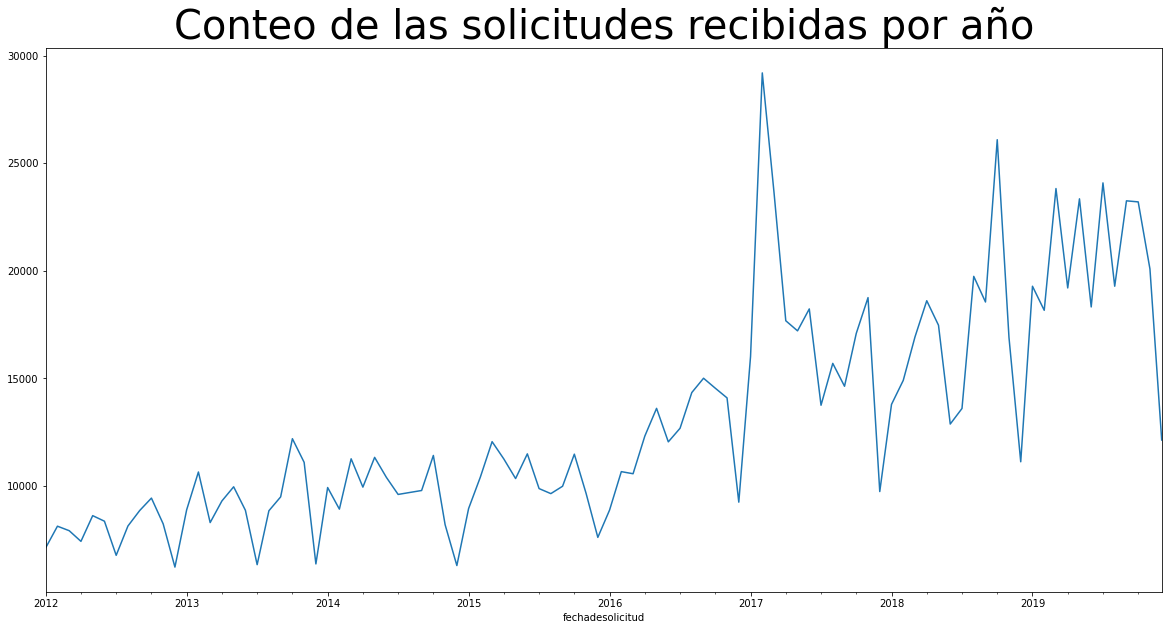

In [358]:
plt.figure(figsize=(20, 10))
plt.title("Conteo de las solicitudes recibidas por año",  fontsize=40)
cuenta_tiempos['folio'].plot()

In [359]:
import plotly.express as px

In [360]:
import plotly.offline as pyo

In [361]:
fig = px.line(cuenta_tiempos, x='fechasolicitud', y='folio', title='Cantidad de solicitudes registradas por mes')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            #dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
#fig.show()
pyo.plot(fig, filename='timeline_solicitudes.html')

'timeline_solicitudes.html'

In [362]:
fig.show()

## Links funcionales y caídos por año

In [23]:
links_caidos = df.copy()

In [24]:
links_caidos.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1


Extracción de category_url

In [25]:
my_df = links_caidos[~links_caidos['archivorespuesta'].isnull()]
#my_df.head()
my_df['category_url'] = my_df['archivorespuesta']
#my_df.head()
my_df.loc[my_df["category_url"].str.contains('https', case=False, na=None), "category_url"] = 'url'
#my_df.head()
#my_df['category_url'].unique()
data = [my_df["folio"], my_df["category_url"]]

headers = ["folio", "category_url"]

df3 = pd.concat(data, axis=1, keys=headers)
#df3.head()

df_nuevo = pd.merge(df, df3, how='left', on=['folio', 'folio'])
df_nuevo.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1,url
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1,url
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1,url


In [26]:
df_nuevo.sample(1)

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
810657,0064100052817,2016-12-29 13:02:58,instituto mexicano del seguro social,terminada,electronica,informacion publica,solicito tenga a bien el reporte de recetas me...,None,None,entrega por internet en la pnt,...,zip,2.0,None,sin respuesta,satisfactoria,no respondida,instituto mexicano del seguro social (imss),2016,12,url


Extraemos los url que no encontraron ningún archivo y los que encontraron archivo

In [27]:
df_nuevo['category_url'].unique()

array(['url', 'None'], dtype=object)

In [28]:
my_df_url = df_nuevo[df_nuevo['category_url']!="None"]

In [29]:
my_df_url.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1,url
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1,url
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1,url


In [30]:
my_df_url['category_url'].unique()

array(['url'], dtype=object)

In [31]:
my_df_url['tipo_archivo_respuesta'].unique()

array(['pdf', 'zip', 'doc', 'None', 'PDF', 'xls', 'ZIP', 'DOC', 'XLS',
       'docx', 'Pdf', 'txt', 'rar', 'msg', 'xlsx'], dtype=object)

Los renglones que tienen al menos un archivo

In [32]:
my_df_con_archivo = my_df_url[my_df_url['tipo_archivo_respuesta']!="None"]

In [33]:
my_df_con_archivo.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1,url
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1,url
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1,url


In [34]:
my_df_con_archivo.sample(1)

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
438687,1621100072019,2019-08-05 13:08:50,agencia nacional de seguridad industrial y de ...,terminada,electronica,informacion publica,obtener copia del de mecanica de suelos y del ...,None,None,entrega por internet en la pnt,...,pdf,1.0,semarnat resolucion numero 564/2019 secretaria...,inexistencia de la informacion solicitada,no respondida,no respondida,semarnat,2019,8,url


In [35]:
my_df_con_archivo['tipo_archivo_respuesta'].unique()

array(['pdf', 'zip', 'doc', 'PDF', 'xls', 'ZIP', 'DOC', 'XLS', 'docx',
       'Pdf', 'txt', 'rar', 'msg', 'xlsx'], dtype=object)

In [36]:
my_df_con_archivo['link_util'] = "link funcional"

<ipython-input-36-dcd39c30ebdc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
my_df_con_archivo.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url,link funcional
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url,link funcional
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1,url,link funcional
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1,url,link funcional
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1,url,link funcional


In [38]:
my_df_sin_archivo = my_df_url[my_df_url['tipo_archivo_respuesta']== "None"]

In [39]:
my_df_sin_archivo.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,None,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,None,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url


In [40]:
my_df_sin_archivo['tipo_archivo_respuesta'].unique()

array(['None'], dtype=object)

In [41]:
my_df_sin_archivo['link_util'] = "link caido"

<ipython-input-41-67b22b5eb419>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
my_df_sin_archivo.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [43]:
utilidad_de_link = my_df_sin_archivo.append(my_df_con_archivo)

In [44]:
utilidad_de_link.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [45]:
utilidad_de_link.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
1248321,0064100006720,2019-12-26 00:58:21,instituto mexicano del seguro social (imss),terminada,electronica,informacion publica,solicitar los manuales de bienvenida organizac...,None,None,entrega por internet en la pnt,...,2.0,None,sin respuesta,satisfactoria,no respondida,instituto mexicano del seguro social (imss),2019,12,url,link funcional
1248759,6110000090019,2019-12-27 10:43:33,banco de mexico (banxico),terminada,electronica,informacion publica,tomando en consideracion que durante los dias ...,nan,None,entrega por internet en la pnt,...,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,organismo autonomo,2019,12,url,link funcional
1248773,0064100011920,2019-12-27 10:56:22,instituto mexicano del seguro social (imss),en espera de ampliacion de informacion,electronica,informacion publica,solicitud de informacion que se a la misma.,nan,None,entrega por internet en la pnt,...,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,instituto mexicano del seguro social (imss),2019,12,url,link funcional
1248990,0002800001220,2019-12-27 16:48:42,secretaria de seguridad y proteccion ciudadana...,terminada,electronica,informacion publica,solicitud descrita en adjunto.,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,...,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sspc,2019,12,url,link funcional
1249020,0002800001320,2019-12-27 18:50:51,secretaria de seguridad y proteccion ciudadana...,terminada,electronica,informacion publica,la onu participo esta participando en la confo...,nan,None,entrega por internet en la pnt,...,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sspc,2019,12,url,link funcional


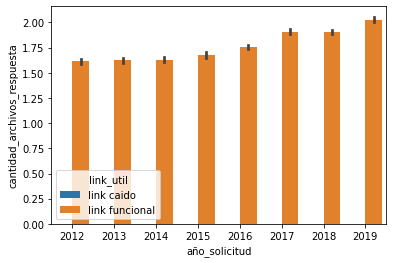

In [46]:
ax = sns.barplot(x="año_solicitud", y="cantidad_archivos_respuesta", hue="link_util", data=utilidad_de_link)

In [47]:
tabla = pd.crosstab(utilidad_de_link['año_solicitud'], utilidad_de_link['link_util'], rownames = ['año_solicitud'], colnames = ['link_util'])#, margins = True,normalize = 'index');

In [48]:
tabla

link_util,link caido,link funcional
año_solicitud,,
2012,7392,72828
2013,8114,83820
2014,7430,90434
2015,7188,95784
2016,7431,113613
2017,9447,176678
2018,8163,158898
2019,11210,190739


Text(0.5, 1.0, 'Conteo de los links utilizables por año')

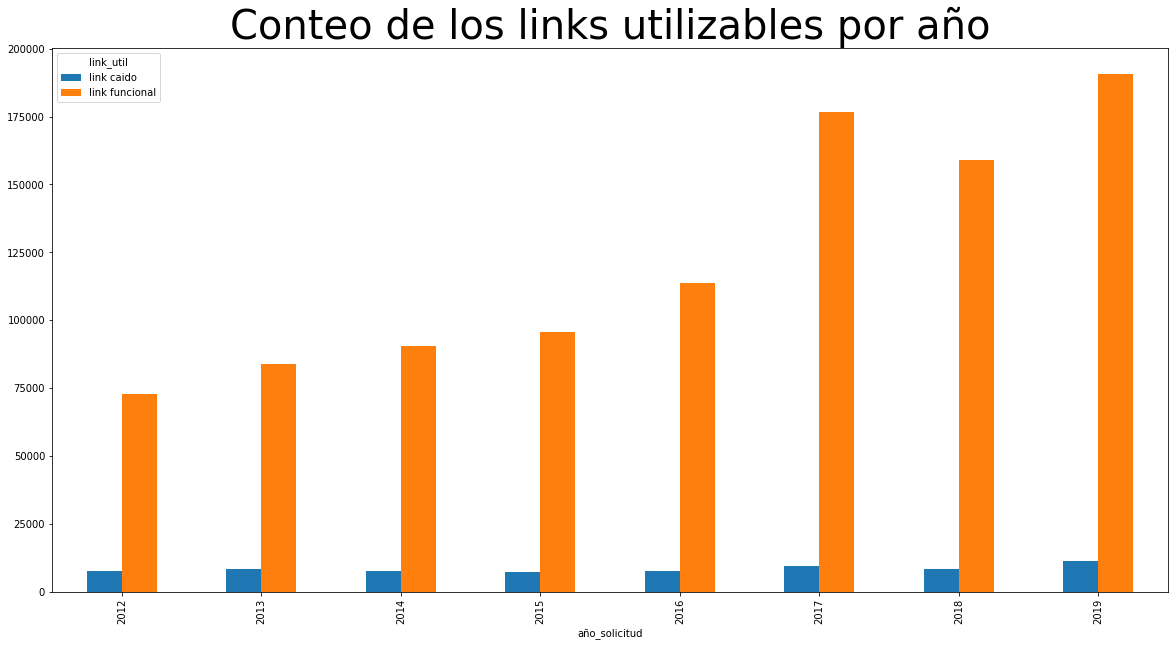

In [49]:
tabla.plot(kind='bar', figsize=(20, 10))
plt.title(label = "Conteo de los links utilizables por año" , fontsize=40)

Dandole formato a la tabla para mejor visibilidad

In [50]:
tabla_link_formateada=pd.DataFrame(tabla)

In [51]:
tabla_link_formateada['año_solicitud']= tabla.index

In [52]:
tabla_link_formateada

link_util,link caido,link funcional,año_solicitud
año_solicitud,,,
2012,7392,72828,2012
2013,8114,83820,2013
2014,7430,90434,2014
2015,7188,95784,2015
2016,7431,113613,2016
2017,9447,176678,2017
2018,8163,158898,2018
2019,11210,190739,2019


In [53]:
dataframe_de_tabla1 = pd.DataFrame()

In [54]:
dataframe_de_tabla1['año_solicitud']= list(tabla_link_formateada.index)

In [55]:
dataframe_de_tabla1['link_caido'] = list(tabla_link_formateada['link caido'])

In [56]:
dataframe_de_tabla1['link_funcional'] = list(tabla_link_formateada['link funcional'])

In [57]:
dataframe_de_tabla1['total'] = dataframe_de_tabla1['link_caido']+dataframe_de_tabla1['link_funcional']

In [58]:
dataframe_de_tabla1['porcentaje_caido'] = (dataframe_de_tabla1['link_caido']/dataframe_de_tabla1['total']).mul(100).round(2).astype(str)+'%'

In [59]:
dataframe_de_tabla1['porcentaje_funcional'] = (dataframe_de_tabla1['link_funcional']/dataframe_de_tabla1['total']).mul(100).round(2).astype(str)+'%'

In [60]:
dataframe_de_tabla1['link_caido'] = dataframe_de_tabla1['link_caido'].map('{:,}'.format)
dataframe_de_tabla1['link_funcional'] = dataframe_de_tabla1['link_funcional'].map('{:,}'.format)
dataframe_de_tabla1['total'] = dataframe_de_tabla1['total'].map('{:,}'.format)


In [61]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_de_tabla1

,año_solicitud,link_caido,link_funcional,total,porcentaje_caido,porcentaje_funcional
0,2012,"7,392","72,828","80,220",9.21%,90.79%
1,2013,"8,114","83,820","91,934",8.83%,91.17%
2,2014,"7,430","90,434","97,864",7.59%,92.41%
3,2015,"7,188","95,784","102,972",6.98%,93.02%
4,2016,"7,431","113,613","121,044",6.14%,93.86%
5,2017,"9,447","176,678","186,125",5.08%,94.92%
6,2018,"8,163","158,898","167,061",4.89%,95.11%
7,2019,"11,210","190,739","201,949",5.55%,94.45%


In [62]:
dataframe_de_tabla1.dtypes

año_solicitud            int64
link_caido              object
link_funcional          object
total                   object
porcentaje_caido        object
porcentaje_funcional    object
dtype: object

## Links versus no links

In [63]:
tabla_urls = pd.crosstab(df_nuevo['año_solicitud'], df_nuevo['category_url'], rownames = ['año_solicitud'], colnames = ['category_url'])#, margins = True,normalize = 'index');

In [64]:
tabla_urls

category_url,None,url
año_solicitud,,
2012,15050,80220
2013,18403,91934
2014,18947,97864
2015,19803,102972
2016,26970,121044
2017,25520,186125
2018,33552,167061
2019,42254,201949


Text(0.5, 1.0, 'Conteo de las respuestas con un link por año')

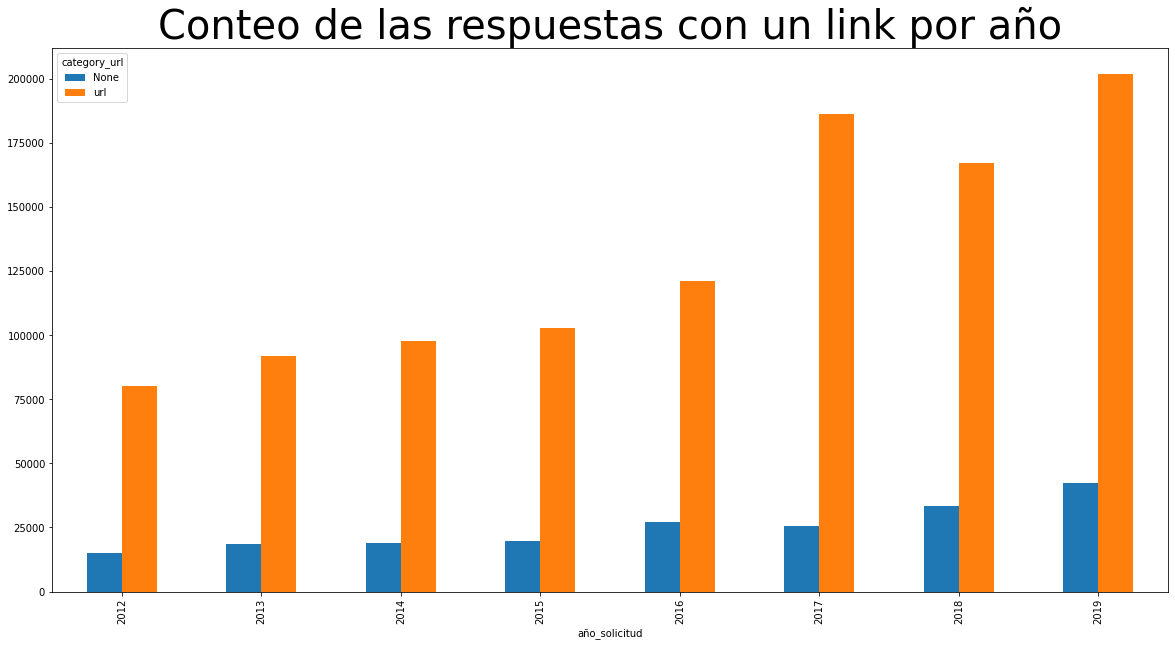

In [65]:
tabla_urls.plot(kind='bar', figsize=(20, 10))
plt.title(label = "Conteo de las respuestas con un link por año" , fontsize=40)

In [66]:
tabla_urls_formateada=pd.DataFrame(tabla_urls)

In [67]:
tabla_urls_formateada['año_solicitud']= tabla_urls.index

In [68]:
tabla_urls_formateada

category_url,None,url,año_solicitud
año_solicitud,,,
2012,15050,80220,2012
2013,18403,91934,2013
2014,18947,97864,2014
2015,19803,102972,2015
2016,26970,121044,2016
2017,25520,186125,2017
2018,33552,167061,2018
2019,42254,201949,2019


In [69]:
tabla_urls_formateada

category_url,None,url,año_solicitud
año_solicitud,,,
2012,15050,80220,2012
2013,18403,91934,2013
2014,18947,97864,2014
2015,19803,102972,2015
2016,26970,121044,2016
2017,25520,186125,2017
2018,33552,167061,2018
2019,42254,201949,2019


In [70]:
dataframe_de_tabla_urls = pd.DataFrame()

In [71]:
dataframe_de_tabla_urls['año_solicitud']= list(tabla_urls_formateada.index)

In [72]:
dataframe_de_tabla_urls['sin_url'] = list(tabla_urls_formateada['None'])

In [73]:
dataframe_de_tabla_urls['con_url'] = list(tabla_urls_formateada['url'])

In [74]:
dataframe_de_tabla_urls['total'] = dataframe_de_tabla_urls['sin_url']+dataframe_de_tabla_urls['con_url']

In [75]:
dataframe_de_tabla_urls['porcentaje_sin_url'] = (dataframe_de_tabla_urls['sin_url']/dataframe_de_tabla_urls['total']).mul(100).round(2).astype(str)+'%'

In [76]:
dataframe_de_tabla_urls['porcentaje_con_url'] = (dataframe_de_tabla_urls['con_url']/dataframe_de_tabla_urls['total']).mul(100).round(2).astype(str)+'%'

In [77]:
dataframe_de_tabla_urls['sin_url'] = dataframe_de_tabla_urls['sin_url'].map('{:,}'.format)
dataframe_de_tabla_urls['con_url'] = dataframe_de_tabla_urls['con_url'].map('{:,}'.format)
dataframe_de_tabla_urls['total'] = dataframe_de_tabla_urls['total'].map('{:,}'.format)


In [78]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_de_tabla_urls

,año_solicitud,sin_url,con_url,total,porcentaje_sin_url,porcentaje_con_url
0,2012,"15,050","80,220","95,270",15.8%,84.2%
1,2013,"18,403","91,934","110,337",16.68%,83.32%
2,2014,"18,947","97,864","116,811",16.22%,83.78%
3,2015,"19,803","102,972","122,775",16.13%,83.87%
4,2016,"26,970","121,044","148,014",18.22%,81.78%
5,2017,"25,520","186,125","211,645",12.06%,87.94%
6,2018,"33,552","167,061","200,613",16.72%,83.28%
7,2019,"42,254","201,949","244,203",17.3%,82.7%


## Tipo de archivo contra número de solicitudes

In [79]:
utilidad_de_link.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [80]:
utilidad_de_link.columns

Index(['folio', 'fechasolicitud', 'dependencia', 'estatus', 'medioentrada',
       'tiposolicitud', 'descripcionsolicitud', 'otrosdatos',
       'archivoadjuntosolicitud', 'medioentrega', 'fechalimite', 'respuesta',
       'textorespuesta', 'archivorespuesta', 'fecharespuesta', 'pais',
       'estado', 'municipio', 'codigopostal', 'sector',
       'tipo_archivo_respuesta', 'cantidad_archivos_respuesta',
       'texto_respuesta_adjunto', 'respuestareal', 'calidad_respuesta',
       'calidad_respuesta_real', 'dependencia_clean', 'año_solicitud',
       'mes_solicitud', 'category_url', 'link_util'],
      dtype='object')

In [81]:
utilidad_de_link_tipo_archivo = utilidad_de_link.copy()

In [82]:
utilidad_de_link_tipo_archivo['tipo_archivo_respuesta']= utilidad_de_link_tipo_archivo['tipo_archivo_respuesta'].str.lower()

In [83]:
#utilidad_de_link_tipo_archivo = utilidad_de_link.copy()
utilidad_de_link_tipo_archivo.groupby('tipo_archivo_respuesta').count()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
tipo_archivo_respuesta,,,,,,,,,,,,,,,,,,,,,
doc,87911,87911,87911,87911,87911,87911,87911,87911,87911,87911,...,87911,87911,87911,87911,87911,87911,87911,87911,87911,87911
docx,37,37,37,37,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
msg,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
none,66375,66375,66375,66375,66375,66375,66375,66375,66375,66375,...,0,66375,66375,66375,66375,66375,66375,66375,66375,66375
pdf,558313,558313,558313,558313,558313,558313,558313,558313,558313,558313,...,558313,558313,558313,558313,558313,558313,558313,558313,558313,558313
rar,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
txt,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
xls,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156,...,2156,2156,2156,2156,2156,2156,2156,2156,2156,2156
xlsx,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [84]:
tabla_tipoarchivo = pd.crosstab(utilidad_de_link_tipo_archivo['año_solicitud'], utilidad_de_link_tipo_archivo['tipo_archivo_respuesta'], rownames = ['año_solicitud'], colnames = ['tipo_archivo_respuesta'])#, margins = True,normalize = 'index');

In [85]:
tabla_tipoarchivo

tipo_archivo_respuesta,doc,docx,msg,none,pdf,rar,txt,xls,xlsx,zip
año_solicitud,,,,,,,,,,
2012,13018,0,0,7392,38874,1,0,323,0,20612
2013,14397,0,1,8114,44424,0,0,262,0,24736
2014,12076,0,0,7430,50359,0,0,230,0,27769
2015,10304,0,0,7188,55784,0,0,185,0,29511
2016,11426,12,0,7431,64406,0,0,236,0,37533
2017,12269,0,0,9447,101535,0,0,257,1,62616
2018,6422,11,0,8163,92496,0,0,333,2,59634
2019,7999,14,0,11210,110435,0,1,330,1,71959


In [86]:
tablaconteo_tipoarch = eda.CreaTablaConteoPorcentaje(utilidad_de_link_tipo_archivo, 'tipo_archivo_respuesta', False)
tablaconteo_tipoarch

,tipo_archivo_respuesta,porcentaje
pdf,558313,53.21%
zip,334370,31.87%
doc,87911,8.38%
none,66375,6.33%
xls,2156,0.21%
docx,37,0.0%
xlsx,4,0.0%
txt,1,0.0%
msg,1,0.0%
rar,1,0.0%


Text(0.5, 1.0, 'Conteo de los tipos de archivo de respuesta por año')

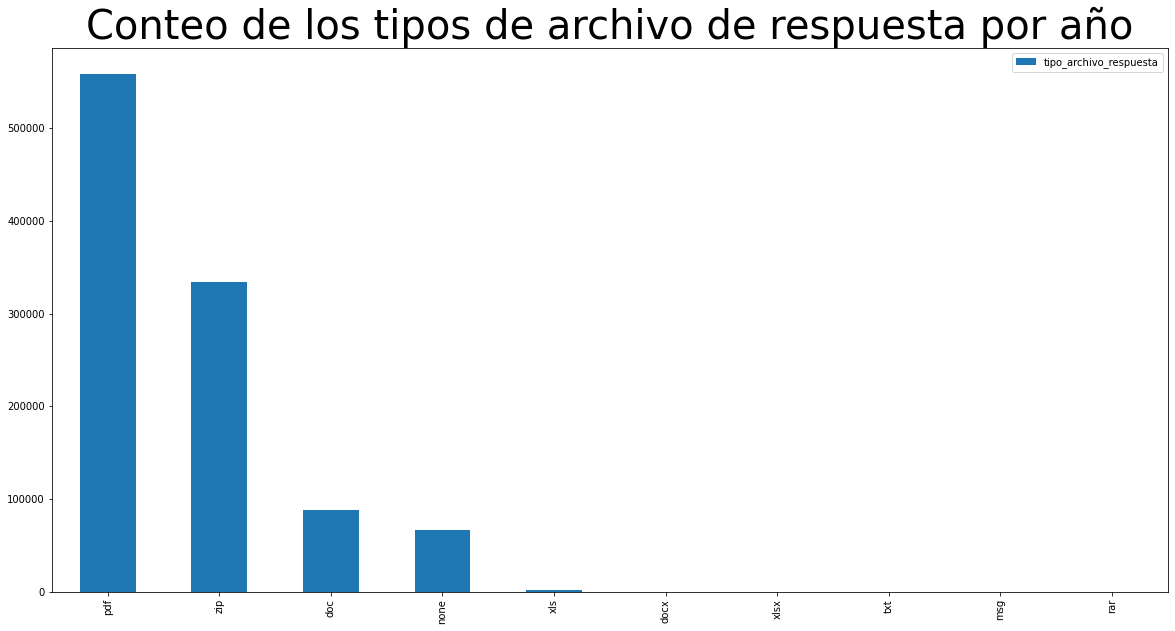

In [87]:
tablaconteo_tipoarch.plot(kind='bar', figsize=(20, 10))
plt.title(label = "Conteo de los tipos de archivo de respuesta por año" , fontsize=40)

In [88]:
dataframe_de_tabla_tipoarch = pd.DataFrame()

In [89]:
dataframe_de_tabla_tipoarch['tipo_archivo_respuesta']= list(tablaconteo_tipoarch.index)

In [90]:
dataframe_de_tabla_tipoarch['conteo'] = list(tablaconteo_tipoarch['tipo_archivo_respuesta'])

In [91]:
dataframe_de_tabla_tipoarch['porcentaje'] = list(tablaconteo_tipoarch['porcentaje'])

In [92]:
dataframe_de_tabla_tipoarch['conteo'] = dataframe_de_tabla_tipoarch['conteo'].map('{:,}'.format)

In [93]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_de_tabla_tipoarch

,tipo_archivo_respuesta,conteo,porcentaje
0,pdf,"558,313",53.21%
1,zip,"334,370",31.87%
2,doc,"87,911",8.38%
3,none,"66,375",6.33%
4,xls,"2,156",0.21%
5,docx,37,0.0%
6,xlsx,4,0.0%
7,txt,1,0.0%
8,msg,1,0.0%
9,rar,1,0.0%


## Obteniendo dependencias (TOP 10)

In [94]:
analisis_dependencias = utilidad_de_link.copy()

### ¿Cuál es el top de dependencias?

In [95]:
tabla_conteo_dependencias = eda.CreaTablaConteoPorcentaje(analisis_dependencias,'dependencia_clean',False)
tabla_conteo_dependencias.head(10)

,dependencia_clean,porcentaje
instituto mexicano del seguro social (imss),74946,7.14%
sep,71020,6.77%
semarnat,60475,5.76%
ssa,52397,4.99%
cofepris,41553,3.96%
organismo descentralizado,38080,3.63%
organismo autonomo,35866,3.42%
pemex,35242,3.36%
shcp,32519,3.1%
segob,30983,2.95%


In [96]:
imss = analisis_dependencias[analisis_dependencias['dependencia_clean']=='instituto mexicano del seguro social (imss)']
sep = analisis_dependencias[analisis_dependencias['dependencia_clean']=='sep']
semarnat = analisis_dependencias[analisis_dependencias['dependencia_clean']=='semarnat']
ssa = analisis_dependencias[analisis_dependencias['dependencia_clean']=='ssa']
cofepris = analisis_dependencias[analisis_dependencias['dependencia_clean']=='cofepris']
organismo_descentralizado = analisis_dependencias[analisis_dependencias['dependencia_clean']=='organismo descentralizado']
organismo_autonomo = analisis_dependencias[analisis_dependencias['dependencia_clean']=='organismo autonomo']
pemex = analisis_dependencias[analisis_dependencias['dependencia_clean']=='pemex']
shcp = analisis_dependencias[analisis_dependencias['dependencia_clean']=='shcp']
segob = analisis_dependencias[analisis_dependencias['dependencia_clean']=='segob']

In [97]:
dependencias_top = pd.DataFrame()

In [98]:
dependencias_top = dependencias_top.append(imss)
dependencias_top = dependencias_top.append(sep)
dependencias_top = dependencias_top.append(semarnat)
dependencias_top = dependencias_top.append(ssa)
dependencias_top = dependencias_top.append(cofepris)
dependencias_top = dependencias_top.append(organismo_descentralizado)
dependencias_top = dependencias_top.append(organismo_autonomo)
dependencias_top = dependencias_top.append(pemex)
dependencias_top = dependencias_top.append(shcp)
dependencias_top = dependencias_top.append(segob)

In [99]:
dependencias_top.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
6006,0064100298612,2012-01-26 16:50:30,instituto mexicano del seguro social,terminada,electronica,informacion publica,guia alimentaria que se proporciona a los nino...,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,1,url,link caido
12087,0064100504612,2012-02-18 13:07:48,instituto mexicano del seguro social,terminada,electronica,informacion publica,distinguidos senores: por este medio me de la ...,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,2,url,link caido
14752,0064100606712,2012-02-28 13:24:09,instituto mexicano del seguro social,desechada por falta de respuesta del ciudadano,electronica,informacion publica,solicito resumen clinico de biopsias que me re...,todos estos documentos que solicito estan en m...,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,instituto mexicano del seguro social (imss),2012,2,url,link caido
17323,0064100708712,2012-03-07 19:49:10,instituto mexicano del seguro social,terminada,electronica,informacion publica,solicito mis tarjetones de correspondientes a ...,los tarjetones son emitidos por el imss en los...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,3,url,link caido
17371,0064100709412,2012-03-08 09:13:48,instituto mexicano del seguro social,terminada,electronica,informacion publica,solicito saber mis aportaciones al seguro social.,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,3,url,link caido


In [100]:
dependencias_top['dependencia_clean'].unique()

array(['instituto mexicano del seguro social (imss)', 'sep', 'semarnat',
       'ssa', 'cofepris', 'organismo descentralizado',
       'organismo autonomo', 'pemex', 'shcp', 'segob'], dtype=object)

In [101]:
tabla_dependencias_clean = pd.crosstab(dependencias_top['año_solicitud'], dependencias_top['dependencia_clean'], rownames = ['año_solicitud'], colnames = ['dependencia_clean'])#, margins = True,normalize = 'index');

In [102]:
tabla_dependencias_clean

dependencia_clean,cofepris,instituto mexicano del seguro social (imss),organismo autonomo,organismo descentralizado,pemex,segob,semarnat,sep,shcp,ssa
año_solicitud,,,,,,,,,,
2012,1498,7336,2152,2685,3233,3465,4168,6663,3094,5122
2013,2577,10320,3188,3605,4154,3427,4817,7478,3326,5076
2014,2544,9211,2546,4811,5148,3577,5669,8097,3205,5426
2015,2715,8215,2149,4526,4661,3740,6340,8520,3904,5121
2016,4856,8645,5613,4132,4292,3767,7472,8454,3506,5546
2017,10166,9749,6362,6698,4736,4272,11811,10252,5208,6867
2018,8108,10291,6003,4820,3597,3358,8888,10938,3541,10483
2019,9089,11179,7853,6803,5421,5377,11310,10618,6735,8756


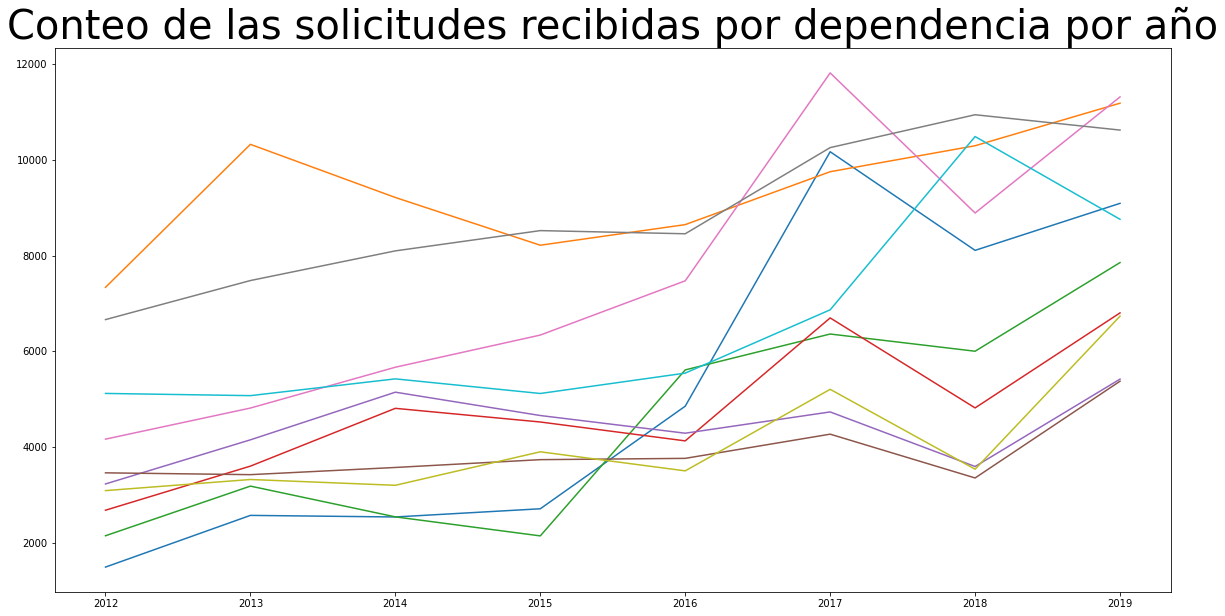

In [103]:
plt.figure(figsize=(20, 10))
plt.title("Conteo de las solicitudes recibidas por dependencia por año",  fontsize=40)
#plt.bar(tabla_dependencias_clean)
plt.plot(tabla_dependencias_clean)
#plt.figure(figsize=(20, 10))
#plt.title("Conteo de las solicitudes recibidas por dependencia por año",  fontsize=40)
#tabla_dependencias_clean.plot()

In [104]:
dependencias_top.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
6006,0064100298612,2012-01-26 16:50:30,instituto mexicano del seguro social,terminada,electronica,informacion publica,guia alimentaria que se proporciona a los nino...,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,1,url,link caido
12087,0064100504612,2012-02-18 13:07:48,instituto mexicano del seguro social,terminada,electronica,informacion publica,distinguidos senores: por este medio me de la ...,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,2,url,link caido
14752,0064100606712,2012-02-28 13:24:09,instituto mexicano del seguro social,desechada por falta de respuesta del ciudadano,electronica,informacion publica,solicito resumen clinico de biopsias que me re...,todos estos documentos que solicito estan en m...,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,instituto mexicano del seguro social (imss),2012,2,url,link caido
17323,0064100708712,2012-03-07 19:49:10,instituto mexicano del seguro social,terminada,electronica,informacion publica,solicito mis tarjetones de correspondientes a ...,los tarjetones son emitidos por el imss en los...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,3,url,link caido
17371,0064100709412,2012-03-08 09:13:48,instituto mexicano del seguro social,terminada,electronica,informacion publica,solicito saber mis aportaciones al seguro social.,None,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,instituto mexicano del seguro social (imss),2012,3,url,link caido


In [105]:
grouped = dependencias_top.groupby(['año_solicitud', 'dependencia_clean'], as_index=False)

In [106]:
grouped

In [107]:
conteoo = grouped.count()

In [108]:
conteoo

,año_solicitud,dependencia_clean,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,mes_solicitud,category_url,link_util
0,2012,cofepris,1498,1498,1498,1498,1498,1498,1498,1498,...,1498,1498,1434,1498,1498,1498,1498,1498,1498,1498
1,2012,instituto mexicano del seguro social (imss),7336,7336,7336,7336,7336,7336,7336,7336,...,7336,7336,7253,7336,7336,7336,7336,7336,7336,7336
2,2012,organismo autonomo,2152,2152,2152,2152,2152,2152,2152,2152,...,2152,2152,1908,2152,2152,2152,2152,2152,2152,2152
3,2012,organismo descentralizado,2685,2685,2685,2685,2685,2685,2685,2685,...,2685,2685,2468,2685,2685,2685,2685,2685,2685,2685
4,2012,pemex,3233,3233,3233,3233,3233,3233,3233,3233,...,3233,3233,2976,3233,3233,3233,3233,3233,3233,3233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019,segob,5377,5377,5377,5377,5377,5377,5377,5377,...,5377,5377,4768,5377,5377,5377,5377,5377,5377,5377
76,2019,semarnat,11310,11310,11310,11310,11310,11310,11310,11310,...,11310,11310,10897,11310,11310,11310,11310,11310,11310,11310
77,2019,sep,10618,10618,10618,10618,10618,10618,10618,10618,...,10618,10618,9983,10618,10618,10618,10618,10618,10618,10618
78,2019,shcp,6735,6735,6735,6735,6735,6735,6735,6735,...,6735,6735,6645,6735,6735,6735,6735,6735,6735,6735


In [109]:
conteoo1 = conteoo[["año_solicitud","dependencia_clean"]]

In [110]:
conteoo1

,año_solicitud,dependencia_clean
0,2012,cofepris
1,2012,instituto mexicano del seguro social (imss)
2,2012,organismo autonomo
3,2012,organismo descentralizado
4,2012,pemex
...,...,...
75,2019,segob
76,2019,semarnat
77,2019,sep
78,2019,shcp


In [111]:
#conteoo1.plot(kind="bar")

In [112]:
#g = sns.FacetGrid(conteoo1, col="año_solicitud",col_wrap=4, height=2)
#g.map(sns.barplot(x="dependencia_clean"))

In [113]:
#sns.catplot(x = "año_solicitud",hue="dependencia_clean", kind="bar", data=tabla_dependencias_clean, col="año_solicitud");

In [114]:
conteoo.dtypes

año_solicitud                   int64
dependencia_clean              object
folio                           int64
fechasolicitud                  int64
dependencia                     int64
estatus                         int64
medioentrada                    int64
tiposolicitud                   int64
descripcionsolicitud            int64
otrosdatos                      int64
archivoadjuntosolicitud         int64
medioentrega                    int64
fechalimite                     int64
respuesta                       int64
textorespuesta                  int64
archivorespuesta                int64
fecharespuesta                  int64
pais                            int64
estado                          int64
municipio                       int64
codigopostal                    int64
sector                          int64
tipo_archivo_respuesta          int64
cantidad_archivos_respuesta     int64
texto_respuesta_adjunto         int64
respuestareal                   int64
calidad_resp

/home/rafaelortega/Documentos/INAI_consultas/inaivenv/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



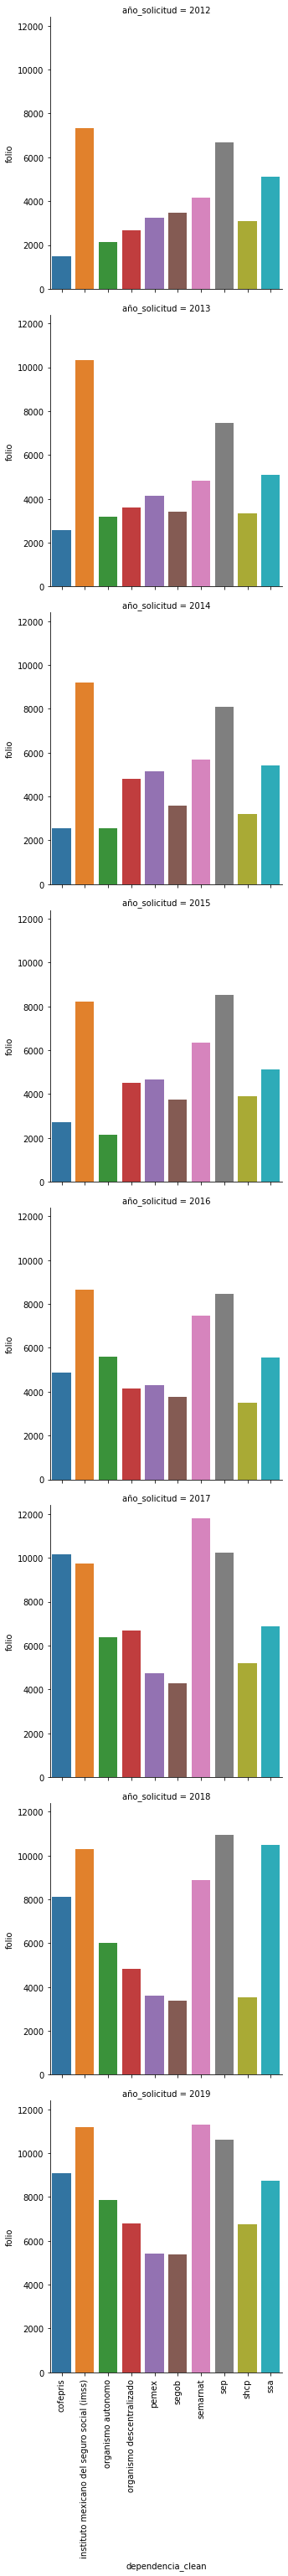

In [115]:
sns.factorplot("dependencia_clean", "folio", col="año_solicitud", data=conteoo, kind="bar", col_wrap = 1).set_xticklabels(rotation=90)

### Separadas por año

In [116]:
dosmil12= conteoo[conteoo['año_solicitud']==2012]
dosmil13= conteoo[conteoo['año_solicitud']==2013]
dosmil14= conteoo[conteoo['año_solicitud']==2014]
dosmil15= conteoo[conteoo['año_solicitud']==2015]
dosmil16= conteoo[conteoo['año_solicitud']==2016]
dosmil17= conteoo[conteoo['año_solicitud']==2017]
dosmil18= conteoo[conteoo['año_solicitud']==2018]
dosmil19= conteoo[conteoo['año_solicitud']==2019]

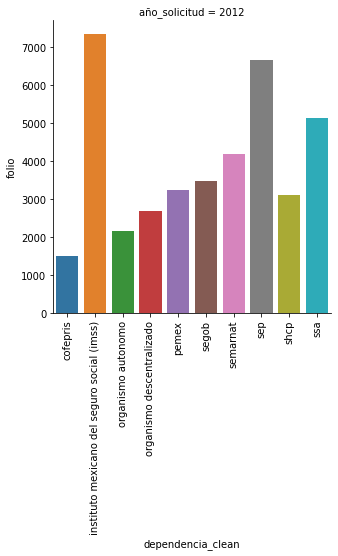

In [117]:
sns.factorplot("dependencia_clean", "folio", col="año_solicitud", data=dosmil12, kind="bar", col_wrap = 1).set_xticklabels(rotation=90)

In [118]:
dosmil12= dependencias_top[dependencias_top['año_solicitud']==2012]
dosmil13= dependencias_top[dependencias_top['año_solicitud']==2013]
dosmil14= dependencias_top[dependencias_top['año_solicitud']==2014]
dosmil15= dependencias_top[dependencias_top['año_solicitud']==2015]
dosmil16= dependencias_top[dependencias_top['año_solicitud']==2016]
dosmil17= dependencias_top[dependencias_top['año_solicitud']==2017]
dosmil18= dependencias_top[dependencias_top['año_solicitud']==2018]
dosmil19= dependencias_top[dependencias_top['año_solicitud']==2019]

[(0.0, 13000.0)]

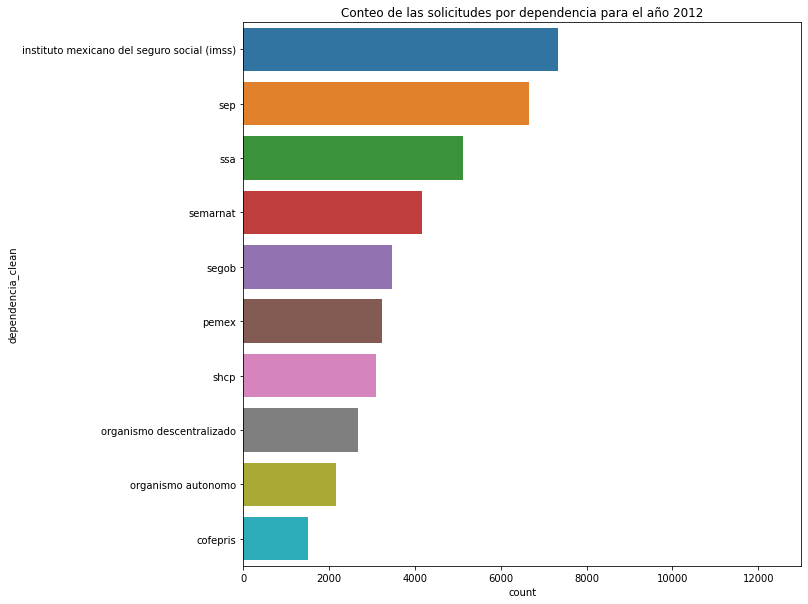

In [119]:
#sns.set_context("paper", font_scale=2)     
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2012")
ax = sns.countplot(y="dependencia_clean", data=dosmil12,order = dosmil12['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

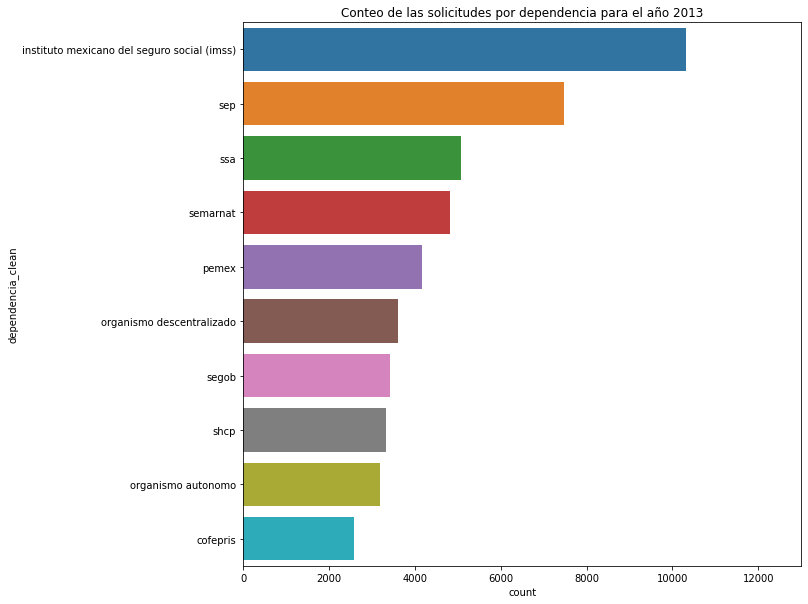

In [120]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2013")
ax = sns.countplot(y="dependencia_clean", data=dosmil13,order = dosmil13['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

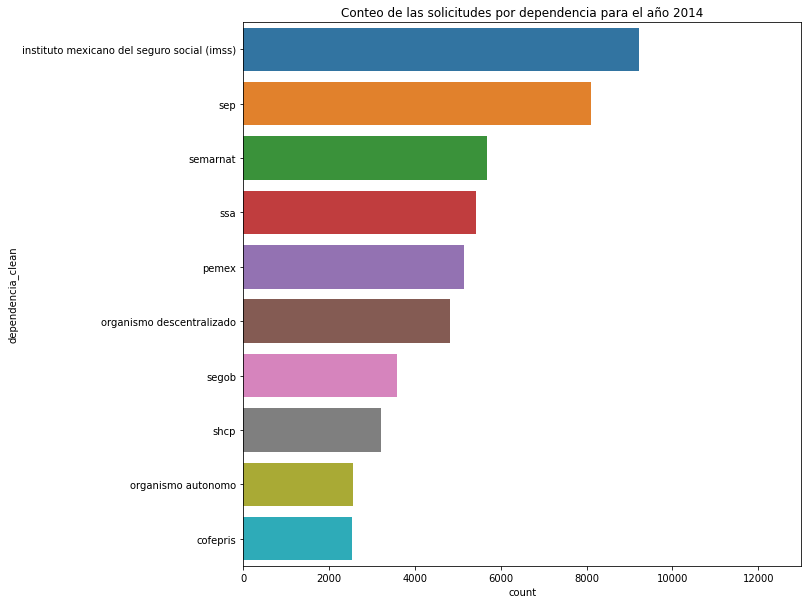

In [121]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2014")
ax = sns.countplot(y="dependencia_clean", data=dosmil14,order = dosmil14['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

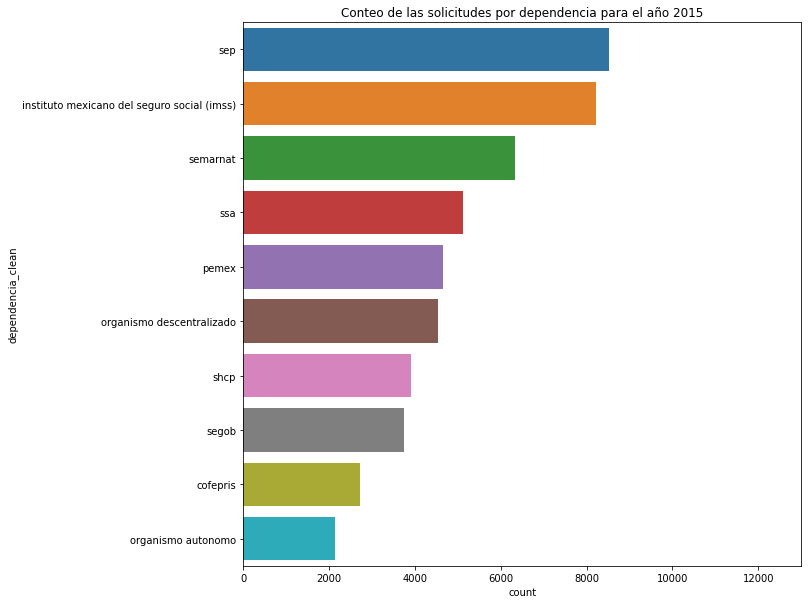

In [122]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2015")
ax = sns.countplot(y="dependencia_clean", data=dosmil15,order = dosmil15['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

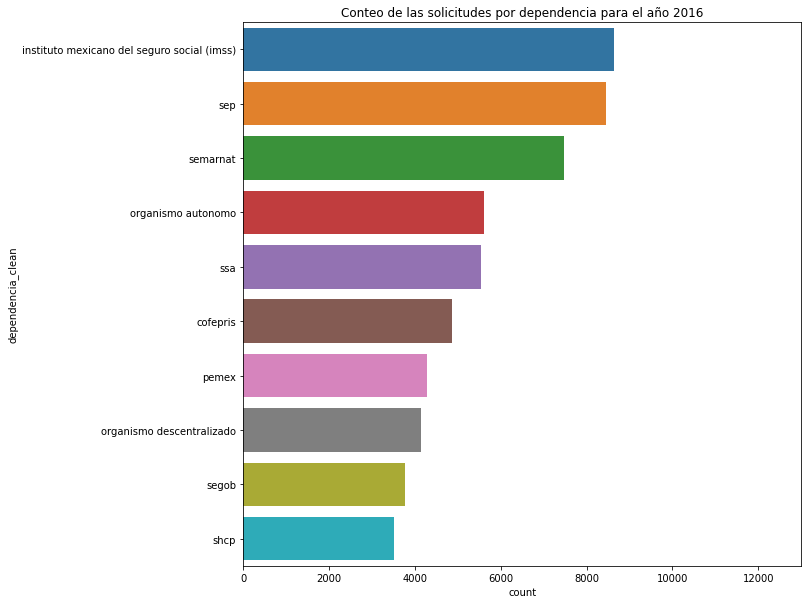

In [123]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2016")
ax = sns.countplot(y="dependencia_clean", data=dosmil16,order = dosmil16['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

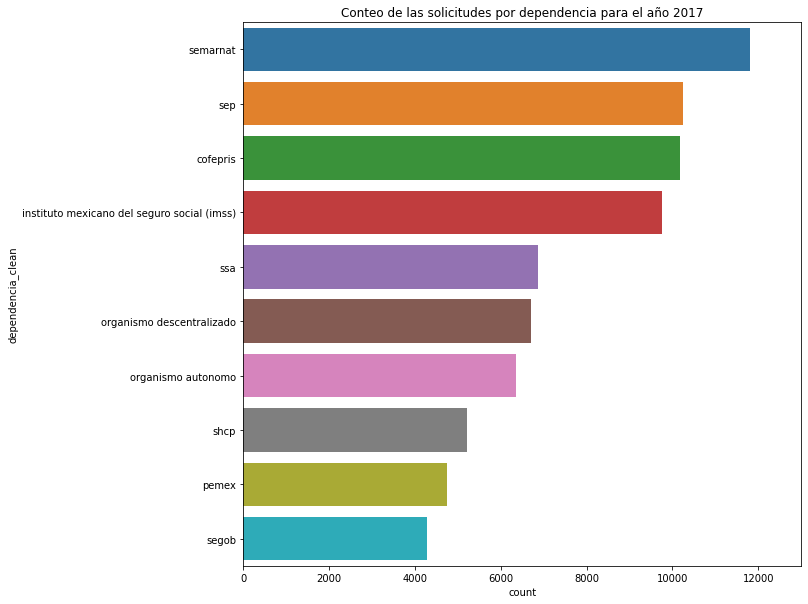

In [124]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2017")
ax = sns.countplot(y="dependencia_clean", data=dosmil17,order = dosmil17['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

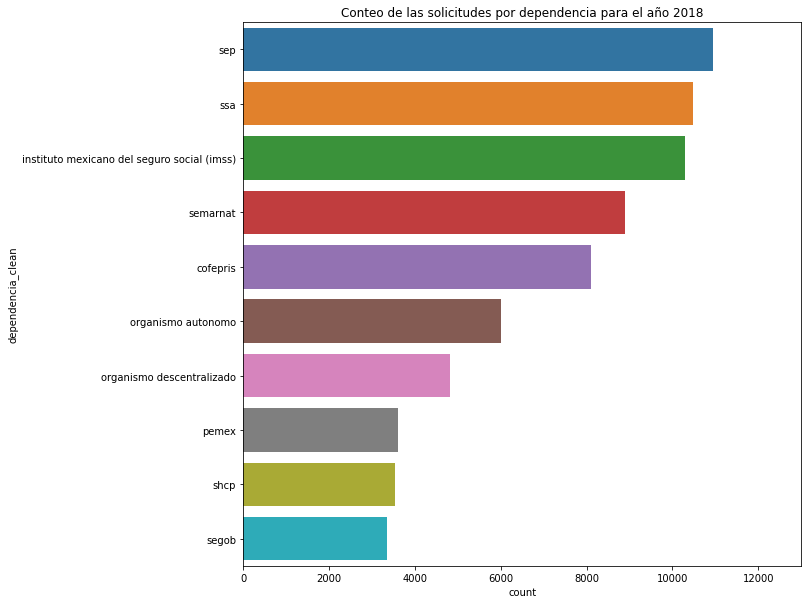

In [125]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2018")
ax = sns.countplot(y="dependencia_clean", data=dosmil18,order = dosmil18['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

[(0.0, 13000.0)]

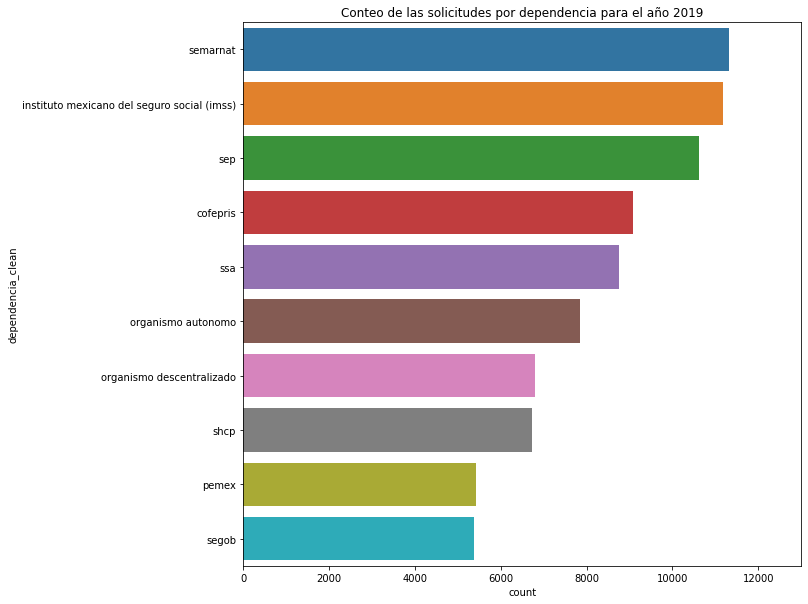

In [126]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia para el año 2019")
ax = sns.countplot(y="dependencia_clean", data=dosmil19,order = dosmil19['dependencia_clean'].value_counts().index)
ax.set(xlim=(0, 13000))

## Conteo de la variable calidad_respuesta

In [127]:
contando_calidad_respuesta = utilidad_de_link.copy()

In [128]:
contando_calidad_respuesta.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [129]:
eda.CreaTablaConteoPorcentaje(contando_calidad_respuesta, 'calidad_respuesta',False)

,calidad_respuesta,porcentaje
satisfactoria,863616,82.31%
no respondida,124181,11.84%
en proceso,61372,5.85%


In [130]:
tabla_calidad_respuestas = pd.crosstab(contando_calidad_respuesta['año_solicitud'], contando_calidad_respuesta['calidad_respuesta'], rownames = ['año_solicitud'], colnames = ['calidad_respuesta'])#, margins = True,normalize = 'index');
tabla_calidad_respuestas

calidad_respuesta,en proceso,no respondida,satisfactoria
año_solicitud,,,
2012,5474,11354,63392
2013,5779,12398,73757
2014,6114,14639,77111
2015,7551,14895,80526
2016,8453,15603,96988
2017,8380,22446,155299
2018,8130,14673,144258
2019,11491,18173,172285


Dandole formato a la tabla para mejor visibilidad

In [131]:
dataframe_de_tabla_conteo_calidad = pd.DataFrame()

In [132]:
dataframe_de_tabla_conteo_calidad['año_solicitud']= list(tabla_calidad_respuestas.index)

In [133]:
dataframe_de_tabla_conteo_calidad['en_proceso'] = list(tabla_calidad_respuestas['en proceso'])

In [134]:
dataframe_de_tabla_conteo_calidad['no_respondida'] = list(tabla_calidad_respuestas['no respondida'])

In [135]:
dataframe_de_tabla_conteo_calidad['satisfactoria'] = list(tabla_calidad_respuestas['satisfactoria'])

In [136]:
dataframe_de_tabla_conteo_calidad['total'] = dataframe_de_tabla_conteo_calidad['en_proceso']+dataframe_de_tabla_conteo_calidad['no_respondida']+dataframe_de_tabla_conteo_calidad['satisfactoria']

In [137]:
dataframe_de_tabla_conteo_calidad['porcentaje_no_respondida'] = (dataframe_de_tabla_conteo_calidad['no_respondida']/dataframe_de_tabla_conteo_calidad['total']).mul(100).round(2).astype(str)+'%'

In [138]:
dataframe_de_tabla_conteo_calidad['porcentaje_satisfactoria'] = (dataframe_de_tabla_conteo_calidad['satisfactoria']/dataframe_de_tabla_conteo_calidad['total']).mul(100).round(2).astype(str)+'%'

In [139]:
dataframe_de_tabla_conteo_calidad['porcentaje_en_proceso'] = (dataframe_de_tabla_conteo_calidad['en_proceso']/dataframe_de_tabla_conteo_calidad['total']).mul(100).round(2).astype(str)+'%'

In [140]:
dataframe_de_tabla_conteo_calidad['en_proceso'] = dataframe_de_tabla_conteo_calidad['en_proceso'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad['no_respondida'] = dataframe_de_tabla_conteo_calidad['no_respondida'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad['satisfactoria'] = dataframe_de_tabla_conteo_calidad['satisfactoria'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad['total'] = dataframe_de_tabla_conteo_calidad['total'].map('{:,}'.format)


In [141]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_de_tabla_conteo_calidad

,año_solicitud,en_proceso,no_respondida,satisfactoria,total,porcentaje_no_respondida,porcentaje_satisfactoria,porcentaje_en_proceso
0,2012,"5,474","11,354","63,392","80,220",14.15%,79.02%,6.82%
1,2013,"5,779","12,398","73,757","91,934",13.49%,80.23%,6.29%
2,2014,"6,114","14,639","77,111","97,864",14.96%,78.79%,6.25%
3,2015,"7,551","14,895","80,526","102,972",14.47%,78.2%,7.33%
4,2016,"8,453","15,603","96,988","121,044",12.89%,80.13%,6.98%
5,2017,"8,380","22,446","155,299","186,125",12.06%,83.44%,4.5%
6,2018,"8,130","14,673","144,258","167,061",8.78%,86.35%,4.87%
7,2019,"11,491","18,173","172,285","201,949",9.0%,85.31%,5.69%


(0.0, 180000.0)

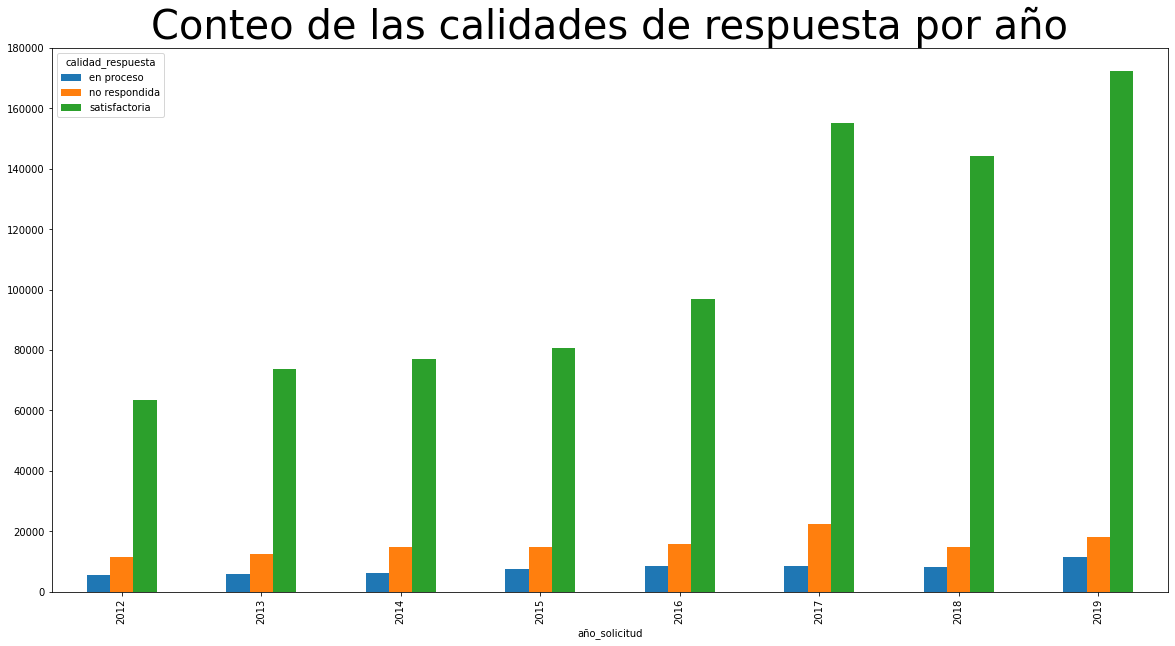

In [142]:
#plt.figure(figsize=(20, 10))
#plt.title("Conteo de las solicitudes recibidas por año",  fontsize=40)
tabla_calidad_respuestas.plot(kind="bar", figsize=(20, 10), title = "Conteo de las calidad de respuesta por año")#, fontsize=40)
plt.title(label = "Conteo de las calidades de respuesta por año" , fontsize=40)
plt.ylim([0, 180000]) 

## Conteo de la variable calidad_respuesta_real

In [143]:
contando_calidad_respuesta_real = utilidad_de_link.copy()

In [144]:
contando_calidad_respuesta_real.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [145]:
eda.CreaTablaConteoPorcentaje(contando_calidad_respuesta_real, 'calidad_respuesta_real',False)

,calidad_respuesta_real,porcentaje
satisfactoria,557827,53.17%
no respondida,429970,40.98%
en proceso,61372,5.85%


In [146]:
tabla_calidad_respuestas_real = pd.crosstab(contando_calidad_respuesta_real['año_solicitud'], 
                                            contando_calidad_respuesta_real['calidad_respuesta_real'], 
                                            rownames = ['año_solicitud'], 
                                            colnames = ['calidad_respuesta_real'])#, margins = True,normalize = 'index');
tabla_calidad_respuestas_real

calidad_respuesta_real,en proceso,no respondida,satisfactoria
año_solicitud,,,
2012,5474,28868,45878
2013,5779,34475,51680
2014,6114,39658,52092
2015,7551,39898,55523
2016,8453,48068,64523
2017,8380,86618,91127
2018,8130,66487,92444
2019,11491,85898,104560


Dandole formato a la tabla para mejor visibilidad

In [147]:
dataframe_de_tabla_conteo_calidad_real = pd.DataFrame()

In [148]:
dataframe_de_tabla_conteo_calidad_real['año_solicitud']= list(tabla_calidad_respuestas_real.index)

In [149]:
dataframe_de_tabla_conteo_calidad_real['en_proceso'] = list(tabla_calidad_respuestas_real['en proceso'])

In [150]:
dataframe_de_tabla_conteo_calidad_real['no_respondida'] = list(tabla_calidad_respuestas_real['no respondida'])

In [151]:
dataframe_de_tabla_conteo_calidad_real['satisfactoria'] = list(tabla_calidad_respuestas_real['satisfactoria'])

In [152]:
dataframe_de_tabla_conteo_calidad_real['total'] = dataframe_de_tabla_conteo_calidad_real['en_proceso']+dataframe_de_tabla_conteo_calidad_real['no_respondida']+dataframe_de_tabla_conteo_calidad_real['satisfactoria']

In [153]:
dataframe_de_tabla_conteo_calidad_real['porcentaje_no_respondida'] = (dataframe_de_tabla_conteo_calidad_real['no_respondida']/dataframe_de_tabla_conteo_calidad_real['total']).mul(100).round(2).astype(str)+'%'

In [154]:
dataframe_de_tabla_conteo_calidad_real['porcentaje_satisfactoria'] = (dataframe_de_tabla_conteo_calidad_real['satisfactoria']/dataframe_de_tabla_conteo_calidad_real['total']).mul(100).round(2).astype(str)+'%'

In [155]:
dataframe_de_tabla_conteo_calidad_real['porcentaje_en_proceso'] = (dataframe_de_tabla_conteo_calidad_real['en_proceso']/dataframe_de_tabla_conteo_calidad_real['total']).mul(100).round(2).astype(str)+'%'

In [156]:
dataframe_de_tabla_conteo_calidad_real['en_proceso'] = dataframe_de_tabla_conteo_calidad_real['en_proceso'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad_real['no_respondida'] = dataframe_de_tabla_conteo_calidad_real['no_respondida'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad_real['satisfactoria'] = dataframe_de_tabla_conteo_calidad_real['satisfactoria'].map('{:,}'.format)
dataframe_de_tabla_conteo_calidad_real['total'] = dataframe_de_tabla_conteo_calidad_real['total'].map('{:,}'.format)


In [157]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_de_tabla_conteo_calidad_real

,año_solicitud,en_proceso,no_respondida,satisfactoria,total,porcentaje_no_respondida,porcentaje_satisfactoria,porcentaje_en_proceso
0,2012,"5,474","28,868","45,878","80,220",35.99%,57.19%,6.82%
1,2013,"5,779","34,475","51,680","91,934",37.5%,56.21%,6.29%
2,2014,"6,114","39,658","52,092","97,864",40.52%,53.23%,6.25%
3,2015,"7,551","39,898","55,523","102,972",38.75%,53.92%,7.33%
4,2016,"8,453","48,068","64,523","121,044",39.71%,53.31%,6.98%
5,2017,"8,380","86,618","91,127","186,125",46.54%,48.96%,4.5%
6,2018,"8,130","66,487","92,444","167,061",39.8%,55.34%,4.87%
7,2019,"11,491","85,898","104,560","201,949",42.53%,51.78%,5.69%


(0.0, 180000.0)

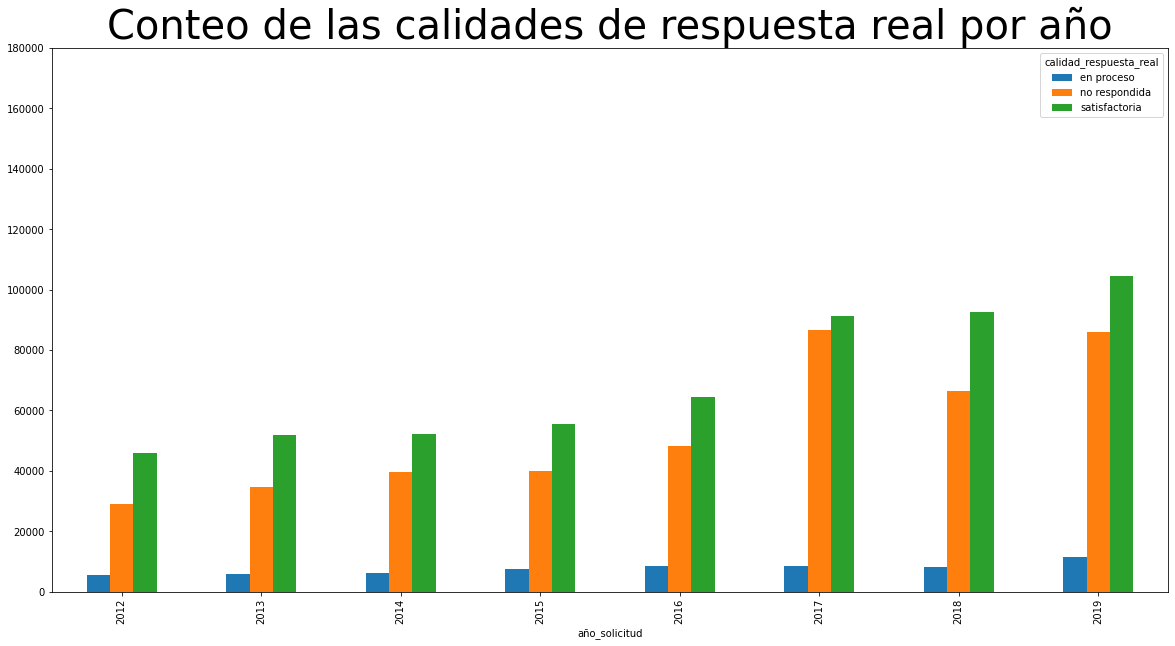

In [158]:
#plt.figure(figsize=(20, 10))
#plt.title("Conteo de las solicitudes recibidas por año",  fontsize=40)
tabla_calidad_respuestas_real.plot(kind="bar", figsize=(20, 10), title = "Conteo de las calidad de respuesta por año")#, fontsize=40)
plt.title(label = "Conteo de las calidades de respuesta real por año" , fontsize=40)
plt.ylim([0, 180000]) 

## Rehaciendo por dependencias

In [159]:
analisis_dependencias1 = utilidad_de_link.copy()

In [160]:
analisis_dependencias1.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


Primero, examinamos el total de dependencias

In [161]:
dependencias_agrupadas =  analisis_dependencias1.groupby(['dependencia_clean'], as_index=False)

In [162]:
conteo_total_dependencias = dependencias_agrupadas.count()
conteo_total_dependencias

,dependencia_clean,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,año_solicitud,mes_solicitud,category_url,link_util
0,administracion portuaria integral,9252,9252,9252,9252,9252,9252,9252,9252,9252,...,9252,8233,9252,9252,9252,9252,9252,9252,9252,9252
1,administracion publica federal,2647,2647,2647,2647,2647,2647,2647,2647,2647,...,2647,2378,2647,2647,2647,2647,2647,2647,2647,2647
2,aeropuertos y servicios auxiliares (asa),4611,4611,4611,4611,4611,4611,4611,4611,4611,...,4611,4401,4611,4611,4611,4611,4611,4611,4611,4611
3,archivo general de la nación,4547,4547,4547,4547,4547,4547,4547,4547,4547,...,4547,4238,4547,4547,4547,4547,4547,4547,4547,4547
4,auditoría superior de la federación,3452,3452,3452,3452,3452,3452,3452,3452,3452,...,3452,3393,3452,3452,3452,3452,3452,3452,3452,3452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,ssa,52397,52397,52397,52397,52397,52397,52397,52397,52397,...,52397,50649,52397,52397,52397,52397,52397,52397,52397,52397
61,sspc,3039,3039,3039,3039,3039,3039,3039,3039,3039,...,3039,3016,3039,3039,3039,3039,3039,3039,3039,3039
62,stps,14245,14245,14245,14245,14245,14245,14245,14245,14245,...,14245,13724,14245,14245,14245,14245,14245,14245,14245,14245
63,tribunales administrativos,6292,6292,6292,6292,6292,6292,6292,6292,6292,...,6292,6260,6292,6292,6292,6292,6292,6292,6292,6292


In [163]:
agrupamiento_total = conteo_total_dependencias[['dependencia_clean','folio']]

In [164]:
agrupamiento_total.head()

,dependencia_clean,folio
0,administracion portuaria integral,9252
1,administracion publica federal,2647
2,aeropuertos y servicios auxiliares (asa),4611
3,archivo general de la nación,4547
4,auditoría superior de la federación,3452


In [165]:
ordenado_dep_total =  agrupamiento_total.sort_values('folio', ascending = False)
ordenado_dep_total

,dependencia_clean,folio
21,instituto mexicano del seguro social (imss),74946
55,sep,71020
52,semarnat,60475
60,ssa,52397
10,cofepris,41553
...,...,...
4,auditoría superior de la federación,3452
7,capufe,3332
61,sspc,3039
1,administracion publica federal,2647


In [166]:
para_graficar_total = ordenado_dep_total.head(10)

Text(0.5, 0, 'conteo')

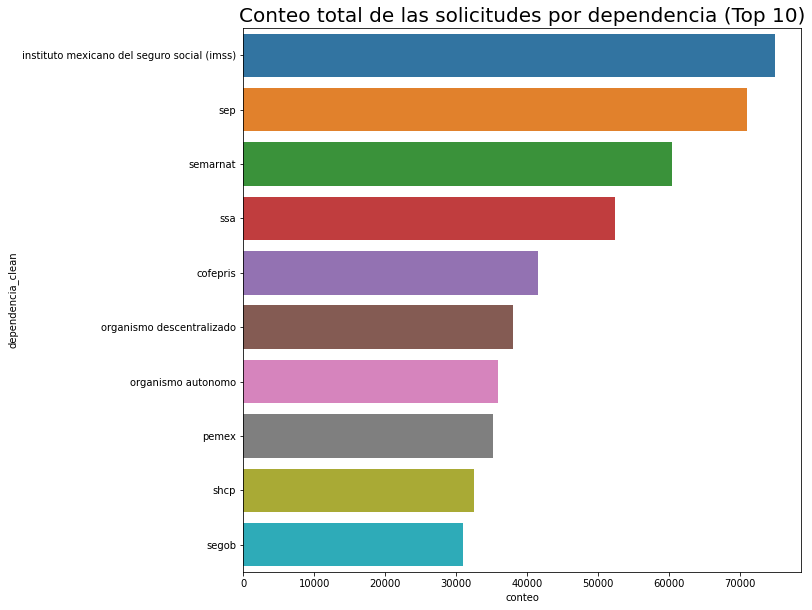

In [167]:
plt.figure(figsize=(10, 10))
plt.title("Conteo total de las solicitudes por dependencia (Top 10)", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_total)
plt.xlabel("conteo")

In [168]:
#para_graficar_total.plot(x = 'dependencia_clean',kind = "bar")

In [169]:
dosmil12_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2012]
dosmil13_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2013]
dosmil14_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2014]
dosmil15_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2015]
dosmil16_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2016]
dosmil17_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2017]
dosmil18_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2018]
dosmil19_again = analisis_dependencias1[analisis_dependencias1['año_solicitud']==2019]

In [170]:
dosmil12_again.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url,link_util
8,0000400002412,2012-01-01 11:33:14,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,se me proporciones en magnetico y por este med...,None,None,entrega por internet en el infomex,...,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,segob,2012,1,url,link caido
33,0715000000712,2012-01-01 14:54:01,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,con fundamento en previsto en los articulos 4 ...,por favor no referenciar a compranet; la prese...,None,entrega por internet en el infomex,...,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sedena,2012,1,url,link caido
61,1111500000512,2012-01-01 19:58:15,colegio de bachilleres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,del 2005 al 2011 se por por de convenios labor...,None,None,entrega por internet en el infomex,...,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,sep,2012,1,url,link caido
77,1857500003512,2012-01-01 21:25:52,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido
83,1857500004012,2012-01-01 21:32:03,pemex exploracion y produccion,terminada,electronica,informacion publica,solicito me proporcionen la siguiente informac...,None,None,entrega por internet en el infomex,...,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,pemex,2012,1,url,link caido


In [171]:
dependencias_agrupadas2012 =  dosmil12_again.groupby(['dependencia_clean'], as_index=False)

In [172]:
conteo_dependencias_2012 = dependencias_agrupadas2012.count()
conteo_dependencias_2012.sample()

,dependencia_clean,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,año_solicitud,mes_solicitud,category_url,link_util
49,shcp,3094,3094,3094,3094,3094,3094,3094,3094,3094,...,3094,2969,3094,3094,3094,3094,3094,3094,3094,3094


In [173]:
agrupamiento_2012 = conteo_dependencias_2012[['dependencia_clean','folio']]

In [174]:
agrupamiento_2012.head()

,dependencia_clean,folio
0,administracion portuaria integral,845
1,administracion publica federal,186
2,aeropuertos y servicios auxiliares (asa),285
3,archivo general de la nación,263
4,banca de desarrollo,731


In [175]:
ordenado_dep_2012 =  agrupamiento_2012.sort_values('folio', ascending = False)
ordenado_dep_2012

,dependencia_clean,folio
17,instituto mexicano del seguro social (imss),7336
47,sep,6663
51,ssa,5122
45,semarnat,4168
43,segob,3465
23,pemex,3233
49,shcp,3094
22,organismo descentralizado,2685
34,sct,2667
24,pgr,2418


In [176]:
para_graficar_2012 = ordenado_dep_2012.head(10)

[(0.0, 13000.0)]

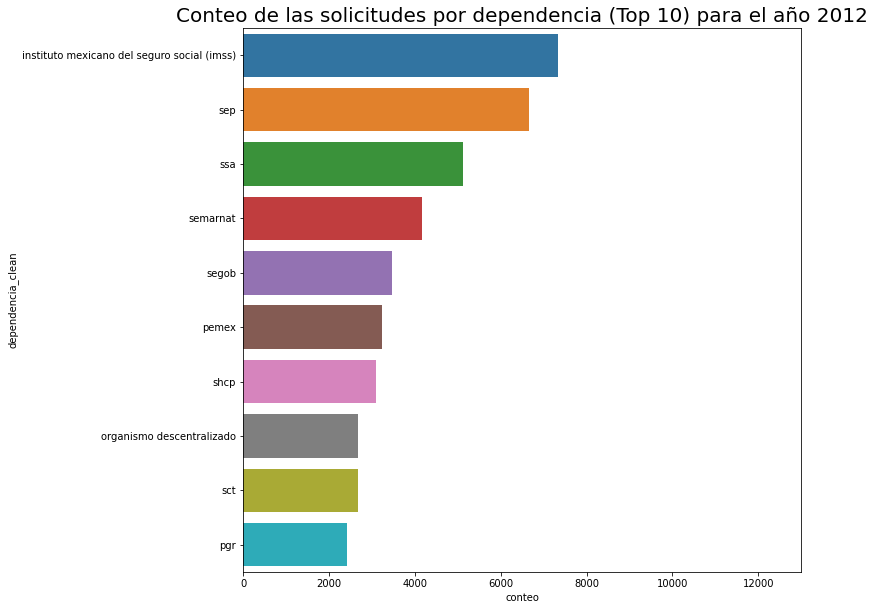

In [177]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2012", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2012)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [178]:
# 2013
dependencias_agrupadas2013 =  dosmil13_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2013 = dependencias_agrupadas2013.count()
#conteo_dependencias_2013.sample()
agrupamiento_2013 = conteo_dependencias_2013[['dependencia_clean','folio']]
#agrupamiento_2013.head()
ordenado_dep_2013 =  agrupamiento_2013.sort_values('folio', ascending = False)
#ordenado_dep_2013
para_graficar_2013 = ordenado_dep_2013.head(10)

[(0.0, 13000.0)]

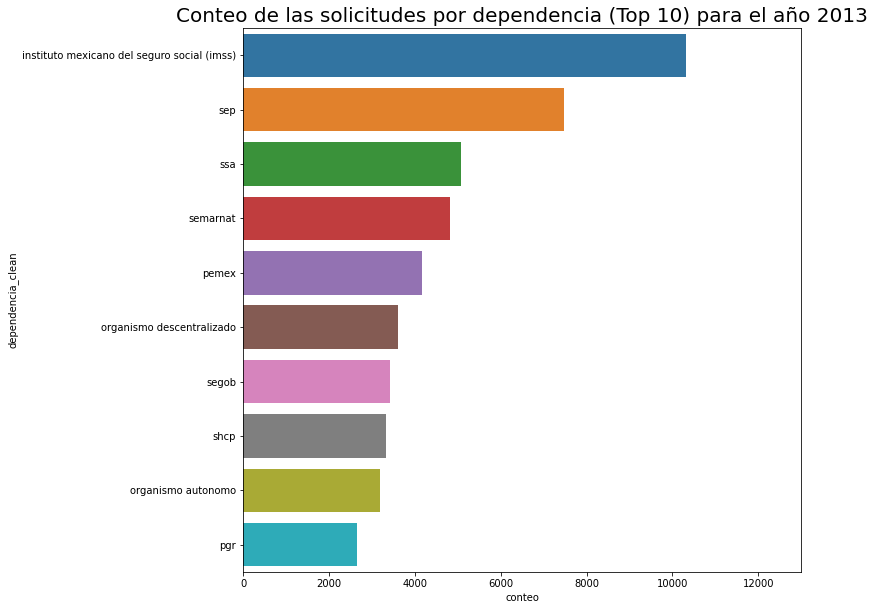

In [179]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2013", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2013)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [180]:
# 2014
dependencias_agrupadas2014 =  dosmil14_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2014 = dependencias_agrupadas2014.count()
#conteo_dependencias_2014.sample()
agrupamiento_2014 = conteo_dependencias_2014[['dependencia_clean','folio']]
#agrupamiento_2014.head()
ordenado_dep_2014 =  agrupamiento_2014.sort_values('folio', ascending = False)
#ordenado_dep_2014
para_graficar_2014 = ordenado_dep_2014.head(10)

[(0.0, 13000.0)]

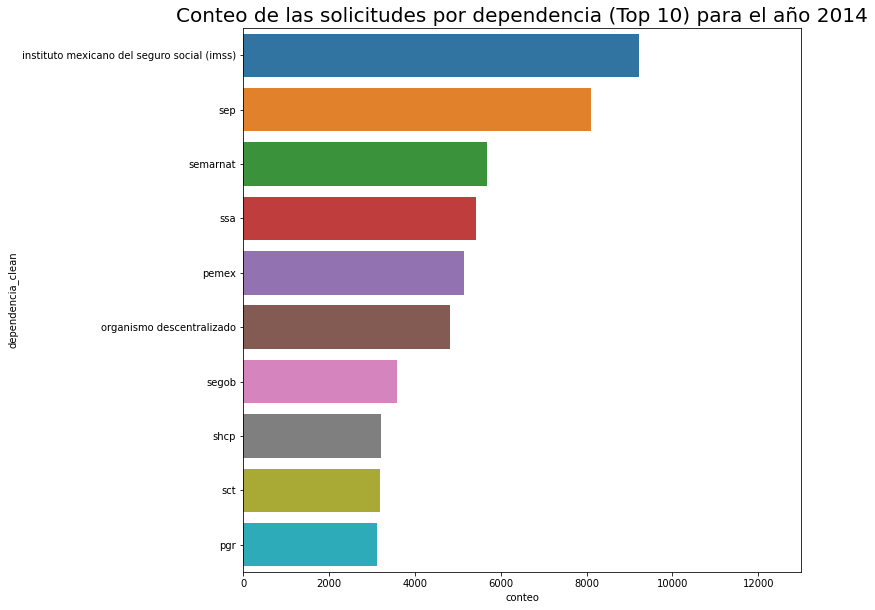

In [181]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2014", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2014)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [182]:
# 2015
dependencias_agrupadas2015 =  dosmil15_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2015 = dependencias_agrupadas2015.count()
#conteo_dependencias_2015.sample()
agrupamiento_2015 = conteo_dependencias_2015[['dependencia_clean','folio']]
#agrupamiento_2015.head()
ordenado_dep_2015 =  agrupamiento_2015.sort_values('folio', ascending = False)
#ordenado_dep_2015
para_graficar_2015 = ordenado_dep_2015.head(10)

[(0.0, 13000.0)]

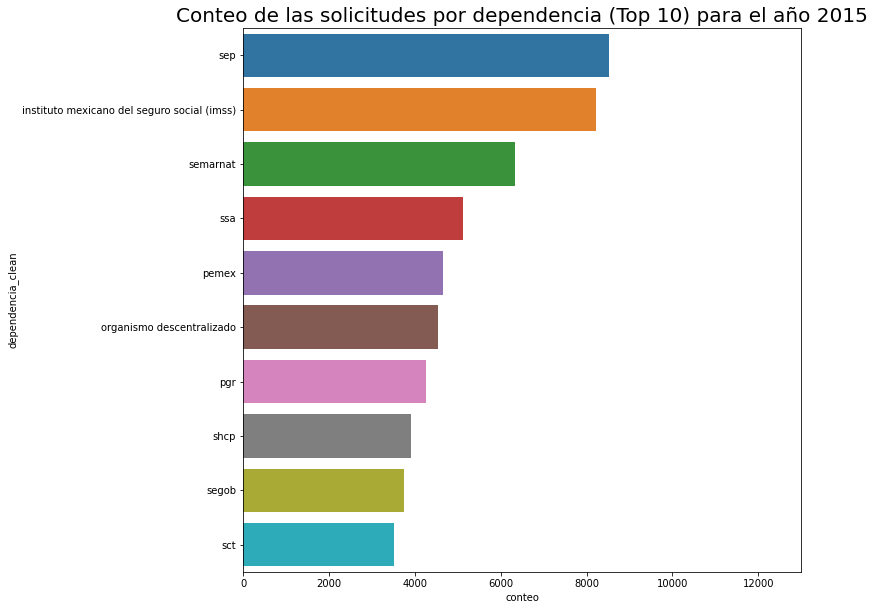

In [183]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2015", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2015)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [184]:
# 2016
dependencias_agrupadas2016 =  dosmil16_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2016 = dependencias_agrupadas2016.count()
#conteo_dependencias_2016.sample()
agrupamiento_2016 = conteo_dependencias_2016[['dependencia_clean','folio']]
#agrupamiento_2016.head()
ordenado_dep_2016 =  agrupamiento_2016.sort_values('folio', ascending = False)
#ordenado_dep_2016
para_graficar_2016 = ordenado_dep_2016.head(10)

[(0.0, 13000.0)]

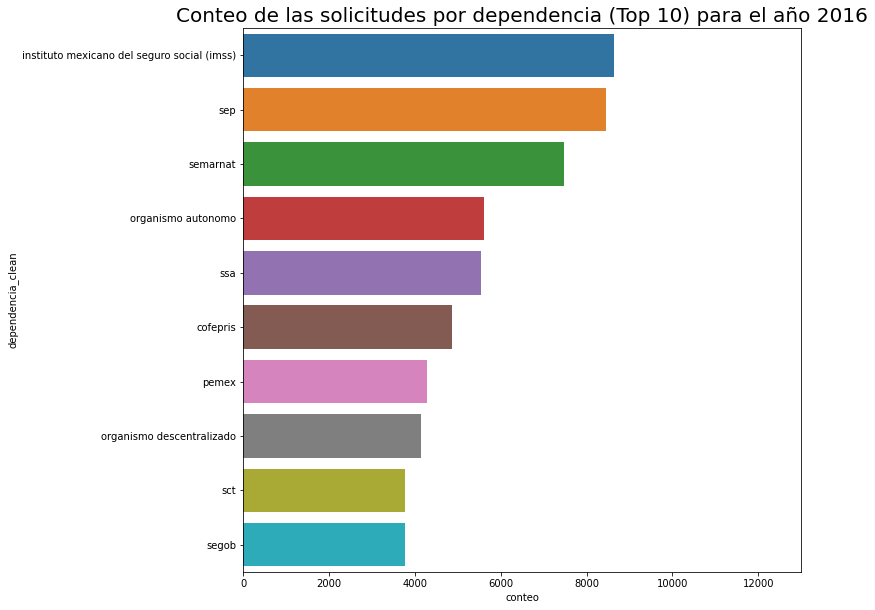

In [185]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2016", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2016)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [186]:
# 2017
dependencias_agrupadas2017 =  dosmil17_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2017 = dependencias_agrupadas2017.count()
#conteo_dependencias_2017.sample()
agrupamiento_2017 = conteo_dependencias_2017[['dependencia_clean','folio']]
#agrupamiento_2017.head()
ordenado_dep_2017 =  agrupamiento_2017.sort_values('folio', ascending = False)
#ordenado_dep_2017
para_graficar_2017 = ordenado_dep_2017.head(10)

[(0.0, 13000.0)]

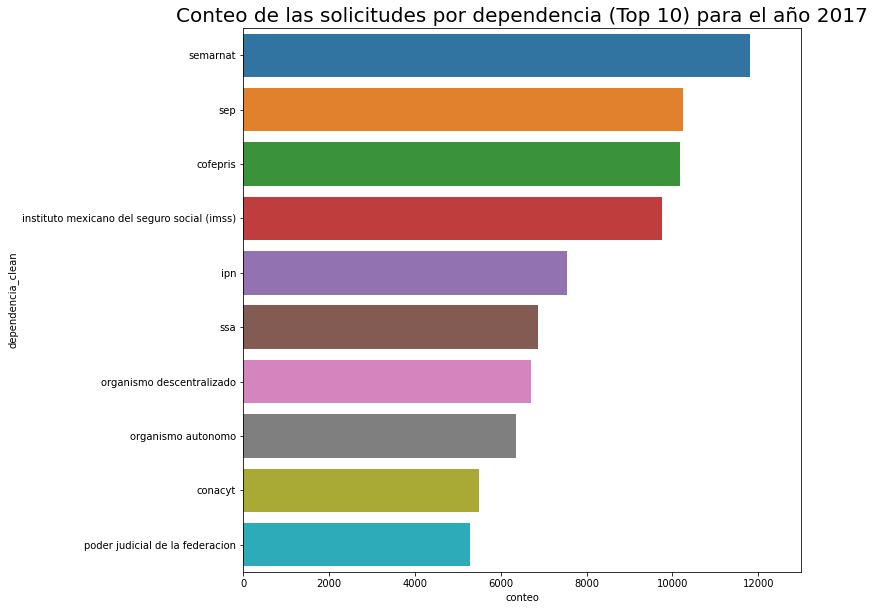

In [187]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2017", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2017)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [188]:
# 2018
dependencias_agrupadas2018 =  dosmil18_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2018 = dependencias_agrupadas2018.count()
#conteo_dependencias_2018.sample()
agrupamiento_2018 = conteo_dependencias_2018[['dependencia_clean','folio']]
#agrupamiento_2018.head()
ordenado_dep_2018 =  agrupamiento_2018.sort_values('folio', ascending = False)
#ordenado_dep_2018
para_graficar_2018 = ordenado_dep_2018.head(10)

[(0.0, 13000.0)]

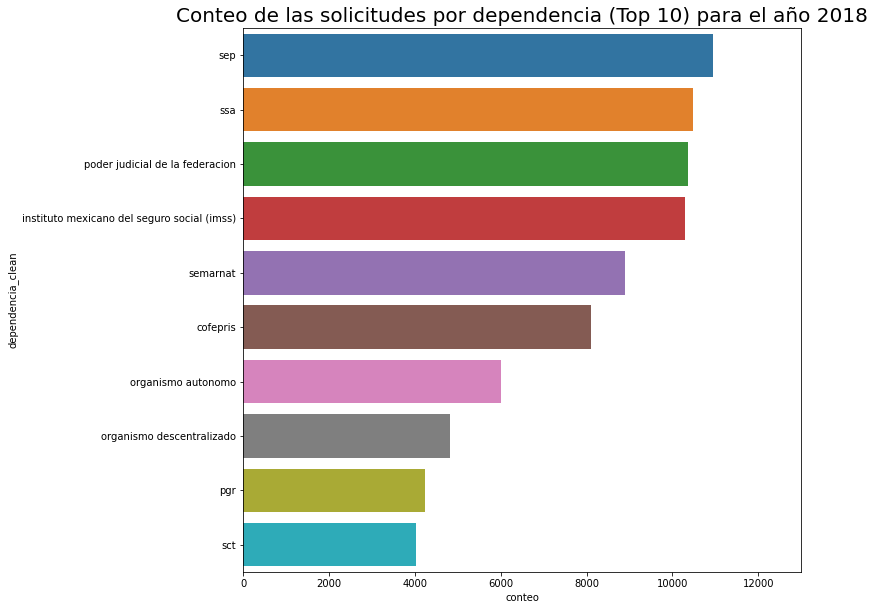

In [189]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2018", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2018)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

In [190]:
# 2019
dependencias_agrupadas2019 =  dosmil19_again.groupby(['dependencia_clean'], as_index=False)
conteo_dependencias_2019 = dependencias_agrupadas2019.count()
#conteo_dependencias_2019.sample()
agrupamiento_2019 = conteo_dependencias_2019[['dependencia_clean','folio']]
#agrupamiento_2019.head()
ordenado_dep_2019 =  agrupamiento_2019.sort_values('folio', ascending = False)
#ordenado_dep_2019
para_graficar_2019 = ordenado_dep_2019.head(10)

[(0.0, 13000.0)]

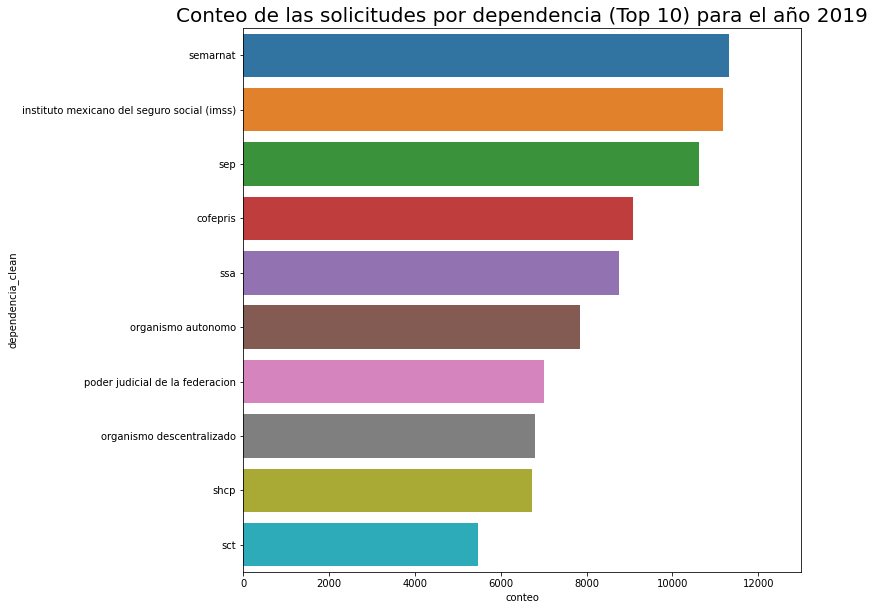

In [191]:
plt.figure(figsize=(10, 10))
plt.title("Conteo de las solicitudes por dependencia (Top 10) para el año 2019", fontsize=20)
ax = sns.barplot(y="dependencia_clean",x = 'folio', data=para_graficar_2019)
plt.xlabel("conteo")
ax.set(xlim=(0, 13000))

### Para hacer tablas de los tops por año

In [192]:
agrupado_dep = analisis_dependencias1.groupby(['año_solicitud', 'dependencia_clean'], as_index=False)

In [193]:
agrupado_dep

In [194]:
conteo_dep = agrupado_dep.count()

In [195]:
conteo_dep

,año_solicitud,dependencia_clean,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,mes_solicitud,category_url,link_util
0,2012,administracion portuaria integral,845,845,845,845,845,845,845,845,...,845,845,703,845,845,845,845,845,845,845
1,2012,administracion publica federal,186,186,186,186,186,186,186,186,...,186,186,172,186,186,186,186,186,186,186
2,2012,aeropuertos y servicios auxiliares (asa),285,285,285,285,285,285,285,285,...,285,285,277,285,285,285,285,285,285,285
3,2012,archivo general de la nación,263,263,263,263,263,263,263,263,...,263,263,96,263,263,263,263,263,263,263
4,2012,banca de desarrollo,731,731,731,731,731,731,731,731,...,731,731,641,731,731,731,731,731,731,731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,2019,ssa,8756,8756,8756,8756,8756,8756,8756,8756,...,8756,8756,8497,8756,8756,8756,8756,8756,8756,8756
472,2019,sspc,1607,1607,1607,1607,1607,1607,1607,1607,...,1607,1607,1588,1607,1607,1607,1607,1607,1607,1607
473,2019,stps,2581,2581,2581,2581,2581,2581,2581,2581,...,2581,2581,2524,2581,2581,2581,2581,2581,2581,2581
474,2019,tribunales administrativos,2712,2712,2712,2712,2712,2712,2712,2712,...,2712,2712,2705,2712,2712,2712,2712,2712,2712,2712


In [196]:
cuenta_dependencias = conteo_dep[['año_solicitud','dependencia_clean','folio']]

In [197]:
cuenta_dependencias.head()

,año_solicitud,dependencia_clean,folio
0,2012,administracion portuaria integral,845
1,2012,administracion publica federal,186
2,2012,aeropuertos y servicios auxiliares (asa),285
3,2012,archivo general de la nación,263
4,2012,banca de desarrollo,731


In [198]:
#cuenta_dependencias.plot(kind="bar")

## Tablas del top 10 de dependencias por año corregidas:

2012

In [199]:
para_graficar_2012

,dependencia_clean,folio
17,instituto mexicano del seguro social (imss),7336
47,sep,6663
51,ssa,5122
45,semarnat,4168
43,segob,3465
23,pemex,3233
49,shcp,3094
22,organismo descentralizado,2685
34,sct,2667
24,pgr,2418


ponemos en formato de miles y con porcentajes

In [200]:
total_registros_2012 = ordenado_dep_2012['folio'].sum()
total_registros_2012

80220

Dandole formato a la tabla para mejor visibilidad

In [201]:
dataframe_por_graficar_2012 = pd.DataFrame()

In [202]:
dataframe_por_graficar_2012['dependencia_clean'] = list(para_graficar_2012['dependencia_clean'])

In [203]:
dataframe_por_graficar_2012['conteo'] = list(para_graficar_2012['folio'])

In [204]:
dataframe_por_graficar_2012['porcentaje_del_total_anual'] = (dataframe_por_graficar_2012['conteo']/total_registros_2012).mul(100).round(2).astype(str)+'%'

In [205]:
dataframe_por_graficar_2012['conteo'] = dataframe_por_graficar_2012['conteo'].map('{:,}'.format)

In [206]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_por_graficar_2012

,dependencia_clean,conteo,porcentaje_del_total_anual
0,instituto mexicano del seguro social (imss),"7,336",9.14%
1,sep,"6,663",8.31%
2,ssa,"5,122",6.38%
3,semarnat,"4,168",5.2%
4,segob,"3,465",4.32%
5,pemex,"3,233",4.03%
6,shcp,"3,094",3.86%
7,organismo descentralizado,"2,685",3.35%
8,sct,"2,667",3.32%
9,pgr,"2,418",3.01%


2013

In [207]:
def creaTablaDelAñoPorDependencia(df_origen, ano_a_evaluar): 
    
    # Extraemos los renglones del año
    filtro_del_año = df_origen[df_origen['año_solicitud']==ano_a_evaluar]
    
    #agrupamos las dependencias
    dependencias_agrupadas_año =  filtro_del_año.groupby(['dependencia_clean'], as_index=False)
    
    #obtenemos el conteo
    conteo_dependencias_año = dependencias_agrupadas_año.count()
    
    # Extraemos las columnas a usar
    agrupamiento_año = conteo_dependencias_año[['dependencia_clean','folio']]

    # Ordenamos para extraer el top
    ordenado_dep_año =  agrupamiento_año.sort_values('folio', ascending = False)
    
    #Extraemos el top
    para_graficar_año = ordenado_dep_año.head(10)
    
    
    # obtenemos el total de registros del año en cuestión
    total_registros_año = ordenado_dep_año['folio'].sum()

    # Inicializamos el data frame vacío que contendrá la tabla
    dataframe_por_graficar_año = pd.DataFrame()

    # pasamos las columnas una por una
    dataframe_por_graficar_año['dependencia_clean'] = list(para_graficar_año['dependencia_clean'])
    dataframe_por_graficar_año['conteo'] = list(para_graficar_año['folio'])

    # calculamos el porcentaje del total anual que le corresponde
    dataframe_por_graficar_año['porcentaje_del_total_anual'] = (dataframe_por_graficar_año['conteo']/total_registros_año).mul(100).round(2).astype(str)+'%'

    # damos el formato de número con coma en los miles
    dataframe_por_graficar_año['conteo'] = dataframe_por_graficar_año['conteo'].map('{:,}'.format)

    # regresamos el dataframe
    return dataframe_por_graficar_año

In [208]:
tabla_top_dependencias_2012 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2012)
tabla_top_dependencias_2012

,dependencia_clean,conteo,porcentaje_del_total_anual
0,instituto mexicano del seguro social (imss),"7,336",9.14%
1,sep,"6,663",8.31%
2,ssa,"5,122",6.38%
3,semarnat,"4,168",5.2%
4,segob,"3,465",4.32%
5,pemex,"3,233",4.03%
6,shcp,"3,094",3.86%
7,organismo descentralizado,"2,685",3.35%
8,sct,"2,667",3.32%
9,pgr,"2,418",3.01%


In [209]:
tabla_top_dependencias_2013 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2013)
tabla_top_dependencias_2013

,dependencia_clean,conteo,porcentaje_del_total_anual
0,instituto mexicano del seguro social (imss),"10,320",11.23%
1,sep,"7,478",8.13%
2,ssa,"5,076",5.52%
3,semarnat,"4,817",5.24%
4,pemex,"4,154",4.52%
5,organismo descentralizado,"3,605",3.92%
6,segob,"3,427",3.73%
7,shcp,"3,326",3.62%
8,organismo autonomo,"3,188",3.47%
9,pgr,"2,642",2.87%


In [210]:
tabla_top_dependencias_2014 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2014)
tabla_top_dependencias_2014

,dependencia_clean,conteo,porcentaje_del_total_anual
0,instituto mexicano del seguro social (imss),"9,211",9.41%
1,sep,"8,097",8.27%
2,semarnat,"5,669",5.79%
3,ssa,"5,426",5.54%
4,pemex,"5,148",5.26%
5,organismo descentralizado,"4,811",4.92%
6,segob,"3,577",3.66%
7,shcp,"3,205",3.27%
8,sct,"3,183",3.25%
9,pgr,"3,115",3.18%


In [211]:
tabla_top_dependencias_2015 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2015)
tabla_top_dependencias_2015

,dependencia_clean,conteo,porcentaje_del_total_anual
0,sep,"8,520",8.27%
1,instituto mexicano del seguro social (imss),"8,215",7.98%
2,semarnat,"6,340",6.16%
3,ssa,"5,121",4.97%
4,pemex,"4,661",4.53%
5,organismo descentralizado,"4,526",4.4%
6,pgr,"4,248",4.13%
7,shcp,"3,904",3.79%
8,segob,"3,740",3.63%
9,sct,"3,501",3.4%


In [212]:
tabla_top_dependencias_2016 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2016)
tabla_top_dependencias_2016

,dependencia_clean,conteo,porcentaje_del_total_anual
0,instituto mexicano del seguro social (imss),"8,645",7.14%
1,sep,"8,454",6.98%
2,semarnat,"7,472",6.17%
3,organismo autonomo,"5,613",4.64%
4,ssa,"5,546",4.58%
5,cofepris,"4,856",4.01%
6,pemex,"4,292",3.55%
7,organismo descentralizado,"4,132",3.41%
8,sct,"3,768",3.11%
9,segob,"3,767",3.11%


In [213]:
tabla_top_dependencias_2017 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2017)
tabla_top_dependencias_2017

,dependencia_clean,conteo,porcentaje_del_total_anual
0,semarnat,"11,811",6.35%
1,sep,"10,252",5.51%
2,cofepris,"10,166",5.46%
3,instituto mexicano del seguro social (imss),"9,749",5.24%
4,ipn,"7,536",4.05%
5,ssa,"6,867",3.69%
6,organismo descentralizado,"6,698",3.6%
7,organismo autonomo,"6,362",3.42%
8,conacyt,"5,492",2.95%
9,poder judicial de la federacion,"5,287",2.84%


In [214]:
tabla_top_dependencias_2018 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2018)
tabla_top_dependencias_2018

,dependencia_clean,conteo,porcentaje_del_total_anual
0,sep,"10,938",6.55%
1,ssa,"10,483",6.27%
2,poder judicial de la federacion,"10,352",6.2%
3,instituto mexicano del seguro social (imss),"10,291",6.16%
4,semarnat,"8,888",5.32%
5,cofepris,"8,108",4.85%
6,organismo autonomo,"6,003",3.59%
7,organismo descentralizado,"4,820",2.89%
8,pgr,"4,236",2.54%
9,sct,"4,021",2.41%


In [215]:
tabla_top_dependencias_2019 = creaTablaDelAñoPorDependencia(analisis_dependencias1,2019)
tabla_top_dependencias_2019

,dependencia_clean,conteo,porcentaje_del_total_anual
0,semarnat,"11,310",5.6%
1,instituto mexicano del seguro social (imss),"11,179",5.54%
2,sep,"10,618",5.26%
3,cofepris,"9,089",4.5%
4,ssa,"8,756",4.34%
5,organismo autonomo,"7,853",3.89%
6,poder judicial de la federacion,"7,018",3.48%
7,organismo descentralizado,"6,803",3.37%
8,shcp,"6,735",3.34%
9,sct,"5,477",2.71%


## Conteo de calidad de respuesta contra url

In [216]:
cr_vs_url = df_nuevo.copy()

In [217]:
cr_vs_url.sample()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
239762,0001100254216,2016-04-26 12:28:01,secretaria de educacion publica,terminada,electronica,informacion publica,solicito me informen de cantidades en parciale...,None,None,entrega por internet en la pnt,...,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,sep,2016,4,url


In [218]:
tabla_cr_vs_url = pd.crosstab(cr_vs_url['calidad_respuesta'], cr_vs_url['category_url'], rownames = ['calidad_respuesta'], colnames = ['category_url'])#, margins = True,normalize = 'index');

In [219]:
tabla_cr_vs_url

category_url,None,url
calidad_respuesta,,
en proceso,1009,61372
no respondida,143250,124181
satisfactoria,56240,863616


(0.0, 900000.0)

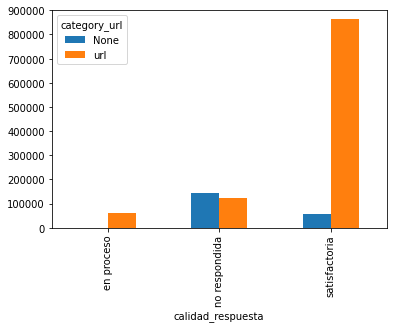

In [220]:
tabla_cr_vs_url.plot(kind='bar')
plt.ylim([0, 900000]) 

Dandole formato a la tabla para mejor visibilidad

In [221]:
dataframe_detabla_cr_vs_url = pd.DataFrame()

In [222]:
dataframe_detabla_cr_vs_url['calidad_respuesta'] = list(tabla_cr_vs_url.index)

In [223]:
dataframe_detabla_cr_vs_url['sin_url'] = list(tabla_cr_vs_url['None'])

In [224]:
dataframe_detabla_cr_vs_url['con_url'] = list(tabla_cr_vs_url['url'])

In [225]:
dataframe_detabla_cr_vs_url['total'] = dataframe_detabla_cr_vs_url['sin_url'] + dataframe_detabla_cr_vs_url['con_url']

In [226]:
dataframe_detabla_cr_vs_url['porcentaje_sin_url'] = (dataframe_detabla_cr_vs_url['sin_url']/dataframe_detabla_cr_vs_url['total']).mul(100).round(2).astype(str)+'%'

In [227]:
dataframe_detabla_cr_vs_url['porcentaje_con_url'] = (dataframe_detabla_cr_vs_url['con_url']/dataframe_detabla_cr_vs_url['total']).mul(100).round(2).astype(str)+'%'

In [228]:
dataframe_detabla_cr_vs_url['sin_url'] = dataframe_detabla_cr_vs_url['sin_url'].map('{:,}'.format)
dataframe_detabla_cr_vs_url['con_url'] = dataframe_detabla_cr_vs_url['con_url'].map('{:,}'.format)
dataframe_detabla_cr_vs_url['total'] = dataframe_detabla_cr_vs_url['total'].map('{:,}'.format)

In [229]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_detabla_cr_vs_url

,calidad_respuesta,sin_url,con_url,total,porcentaje_sin_url,porcentaje_con_url
0,en proceso,"1,009","61,372","62,381",1.62%,98.38%
1,no respondida,"143,250","124,181","267,431",53.57%,46.43%
2,satisfactoria,"56,240","863,616","919,856",6.11%,93.89%


## Conteo de calidad de respuesta real contra url

In [230]:
crr_vs_url = df_nuevo.copy()

In [231]:
crr_vs_url.sample()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
1125209,0064101060619,2019-04-04 10:54:23,instituto mexicano del seguro social (imss),desechada por falta de respuesta del ciudadano,electronica,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,...,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,instituto mexicano del seguro social (imss),2019,4,url


In [232]:
tabla_crr_vs_url = pd.crosstab(crr_vs_url['calidad_respuesta_real'], crr_vs_url['category_url'], rownames = ['calidad_respuesta_real'], colnames = ['category_url'])#, margins = True,normalize = 'index');

In [233]:
tabla_crr_vs_url

category_url,None,url
calidad_respuesta_real,,
en proceso,1009,61372
no respondida,143250,429970
satisfactoria,56240,557827


(0.0, 900000.0)

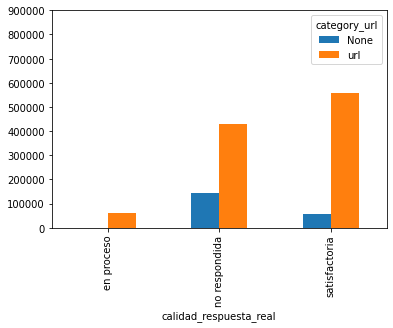

In [234]:
tabla_crr_vs_url.plot(kind='bar')
plt.ylim([0, 900000]) 

Dandole formato a la tabla para mejor visibilidad

In [235]:
dataframe_detabla_crr_vs_url = pd.DataFrame()

In [236]:
dataframe_detabla_crr_vs_url['calidad_respuesta_real'] = list(tabla_crr_vs_url.index)

In [237]:
dataframe_detabla_crr_vs_url['sin_url'] = list(tabla_crr_vs_url['None'])

In [238]:
dataframe_detabla_crr_vs_url['con_url'] = list(tabla_crr_vs_url['url'])

In [239]:
dataframe_detabla_crr_vs_url['total'] = dataframe_detabla_crr_vs_url['sin_url'] + dataframe_detabla_crr_vs_url['con_url']

In [240]:
dataframe_detabla_crr_vs_url['porcentaje_sin_url'] = (dataframe_detabla_crr_vs_url['sin_url']/dataframe_detabla_crr_vs_url['total']).mul(100).round(2).astype(str)+'%'

In [241]:
dataframe_detabla_crr_vs_url['porcentaje_con_url'] = (dataframe_detabla_crr_vs_url['con_url']/dataframe_detabla_crr_vs_url['total']).mul(100).round(2).astype(str)+'%'

In [242]:
dataframe_detabla_crr_vs_url['sin_url'] = dataframe_detabla_crr_vs_url['sin_url'].map('{:,}'.format)
dataframe_detabla_crr_vs_url['con_url'] = dataframe_detabla_crr_vs_url['con_url'].map('{:,}'.format)
dataframe_detabla_crr_vs_url['total'] = dataframe_detabla_crr_vs_url['total'].map('{:,}'.format)

In [243]:
#pd.options.display.float_format = '{:, .2f}'.format
dataframe_detabla_crr_vs_url

,calidad_respuesta_real,sin_url,con_url,total,porcentaje_sin_url,porcentaje_con_url
0,en proceso,"1,009","61,372","62,381",1.62%,98.38%
1,no respondida,"143,250","429,970","573,220",24.99%,75.01%
2,satisfactoria,"56,240","557,827","614,067",9.16%,90.84%


## Para conteo de las que tienen url y las que no

In [244]:
con_sin_url = df_nuevo.copy()

In [245]:
con_sin_url.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud,category_url
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1,url
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1,url
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1,url
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1,url


In [246]:
tablitacsurl = con_sin_url['category_url'].value_counts(dropna=False)
tablitacsurl

url     1049169
None     200499
Name: category_url, dtype: int64

In [247]:
csurl_as_df = pd.DataFrame(tablitacsurl)

In [248]:
csurl_as_df

,category_url
url,1049169
None,200499


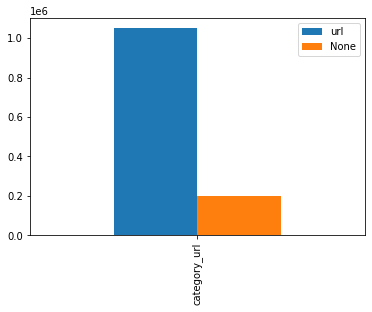

In [249]:
csurl_as_df.transpose().plot(kind='bar')

In [250]:
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

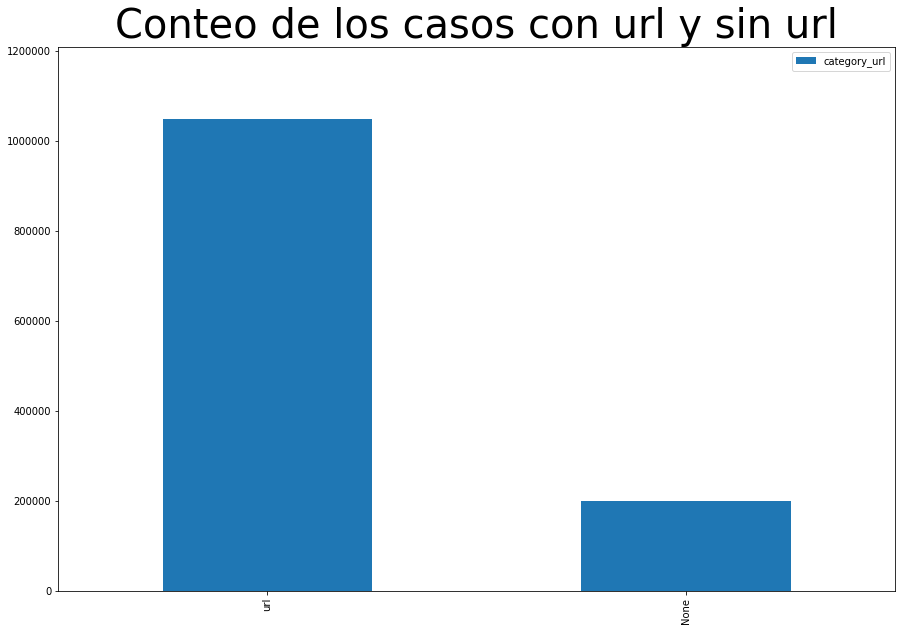

In [251]:
csurl_as_df.plot(kind='bar', figsize=(15, 10))
plt.title(label = "Conteo de los casos con url y sin url" , fontsize=40)
plt.ylim(0,1209180)
plt.ticklabel_format(style='plain', axis='y')

In [252]:
csurl_as_df

,category_url
url,1049169
None,200499


In [253]:
csurl_as_df['conteo'] = csurl_as_df['category_url'].map('{:,}'.format)

In [254]:
csurl_as_df1 = csurl_as_df['conteo']
pd.DataFrame(csurl_as_df1)

,conteo
url,"1,049,169"
None,"200,499"


# Gráficas calidad vs calidad de respuesta real

In [314]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go

In [315]:
dataset_grafico = original.copy()

In [316]:
dataset_grafico.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1


# Graficando agrupado por año

In [317]:
tabla_calidad_respuestas_real

,en_proceso_calidad_respuesta_real,no_respondida__calidad_respuesta_real,satisfactoria_calidad_respuesta_real
año_solicitud,,,
2012,5474,28868,45878
2013,5779,34475,51680
2014,6114,39658,52092
2015,7551,39898,55523
2016,8453,48068,64523
2017,8380,86618,91127
2018,8130,66487,92444
2019,11491,85898,104560


In [318]:
tabla_calidad_respuestas

,en_proceso_calidad_respuesta,no_respondida__calidad_respuesta,satisfactoria_calidad_respuesta
año_solicitud,,,
2012,5474,11354,63392
2013,5779,12398,73757
2014,6114,14639,77111
2015,7551,14895,80526
2016,8453,15603,96988
2017,8380,22446,155299
2018,8130,14673,144258
2019,11491,18173,172285


In [319]:
#print(tabla_calidad_respuestas.add_suffix('_calidad_respuesta'))

In [320]:
tabla_calidad_respuestas.columns = ['en_proceso_calidad_respuesta','no_respondida__calidad_respuesta', 'satisfactoria_calidad_respuesta']

In [321]:
tabla_calidad_respuestas.columns

Index(['en_proceso_calidad_respuesta', 'no_respondida__calidad_respuesta',
       'satisfactoria_calidad_respuesta'],
      dtype='object')

In [322]:
tabla_calidad_respuestas

,en_proceso_calidad_respuesta,no_respondida__calidad_respuesta,satisfactoria_calidad_respuesta
año_solicitud,,,
2012,5474,11354,63392
2013,5779,12398,73757
2014,6114,14639,77111
2015,7551,14895,80526
2016,8453,15603,96988
2017,8380,22446,155299
2018,8130,14673,144258
2019,11491,18173,172285


In [323]:
tabla_calidad_respuestas_real.columns = ['en_proceso_calidad_respuesta_real','no_respondida__calidad_respuesta_real', 'satisfactoria_calidad_respuesta_real']

In [324]:
tabla_calidad_respuestas_real

,en_proceso_calidad_respuesta_real,no_respondida__calidad_respuesta_real,satisfactoria_calidad_respuesta_real
año_solicitud,,,
2012,5474,28868,45878
2013,5779,34475,51680
2014,6114,39658,52092
2015,7551,39898,55523
2016,8453,48068,64523
2017,8380,86618,91127
2018,8130,66487,92444
2019,11491,85898,104560


In [325]:
unidos = tabla_calidad_respuestas.merge(tabla_calidad_respuestas_real,left_on=tabla_calidad_respuestas.index, right_on=tabla_calidad_respuestas_real.index)
unidos

,key_0,en_proceso_calidad_respuesta,no_respondida__calidad_respuesta,satisfactoria_calidad_respuesta,en_proceso_calidad_respuesta_real,no_respondida__calidad_respuesta_real,satisfactoria_calidad_respuesta_real
0,2012,5474,11354,63392,5474,28868,45878
1,2013,5779,12398,73757,5779,34475,51680
2,2014,6114,14639,77111,6114,39658,52092
3,2015,7551,14895,80526,7551,39898,55523
4,2016,8453,15603,96988,8453,48068,64523
5,2017,8380,22446,155299,8380,86618,91127
6,2018,8130,14673,144258,8130,66487,92444
7,2019,11491,18173,172285,11491,85898,104560


In [326]:
x_plotly_dep_year = unidos['key_0'].unique()
x_plotly_dep_year

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [327]:
data = {
    "x":x_plotly_dep_year,
    "en_proceso_calidad_respuesta": unidos['en_proceso_calidad_respuesta'],
    "no_respondida__calidad_respuesta": unidos['no_respondida__calidad_respuesta'],
    "satisfactoria_calidad_respuesta": unidos['satisfactoria_calidad_respuesta'],
    "en_proceso_calidad_respuesta_real": unidos['en_proceso_calidad_respuesta_real'],
    "no_respondida__calidad_respuesta_real": unidos['no_respondida__calidad_respuesta_real'],
    "satisfactoria_calidad_respuesta_real": unidos['satisfactoria_calidad_respuesta_real'],
}

In [328]:
fig = go.Figure(
    data=[
        go.Bar(
            name="en_proceso_calidad_respuesta",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta"],
            offsetgroup=0,
            marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="no_respondida__calidad_respuesta 1",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta"],
            offsetgroup=0,
            base=data["en_proceso_calidad_respuesta"],
            marker=dict(color='red',opacity=0.5),
            
        ),
        go.Bar(
            name="satisfactoria_calidad_respuesta",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta"],
            offsetgroup=0,
            base=data["no_respondida__calidad_respuesta"]+data["en_proceso_calidad_respuesta"],
            marker=dict(color='green',opacity=0.5),
        ),
        
        
        go.Bar(
            name="en_proceso_calidad_respuesta_real",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta_real"],
            offsetgroup=1,
            #base=data["model_1"],
            marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="no_respondida__calidad_respuesta_real",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta_real"],
            offsetgroup=1,
            base=data["en_proceso_calidad_respuesta_real"],
            marker=dict(color='red',opacity=0.5),
        ),
        go.Bar(
            name="satisfactoria_calidad_respuesta_real",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta_real"],
            offsetgroup=1,
            base=data["no_respondida__calidad_respuesta_real"]+data["en_proceso_calidad_respuesta_real"],
            marker=dict(color='green',opacity=0.5),
        )
    ],
    layout=go.Layout(
        title="Comparacion de calidad de respuesta  y calidad de respuesta real por año",
        yaxis_title="Conteo"
        #barmode='group'
    )
)


In [330]:
#fig.show()
pyo.plot(fig, filename='comparacion_por_año.html')

'comparacion_por_año.html'

In [271]:
fig = go.Figure(
    data=[
        go.Bar(
            name="En proceso",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta"],
            offsetgroup=0,
            #marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="No respondida",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta"],
            offsetgroup=0,
            base=data["en_proceso_calidad_respuesta"],
            #marker=dict(color='red',opacity=0.5),
            
        ),
        go.Bar(
            name="Satisfactoria",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta"],
            offsetgroup=0,
            base=data["no_respondida__calidad_respuesta"]+data["en_proceso_calidad_respuesta"],
            #marker=dict(color='green',opacity=0.5),
        ),
        
        
        go.Bar(
            name="En Proceso real",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta_real"],
            offsetgroup=1,
            #base=data["model_1"],
            #marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="No respondida real",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta_real"],
            offsetgroup=1,
            base=data["en_proceso_calidad_respuesta_real"],
            #marker=dict(color='red',opacity=0.5),
        ),
        go.Bar(
            name="Satisfactoria real",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta_real"],
            offsetgroup=1,
            base=data["no_respondida__calidad_respuesta_real"]+data["en_proceso_calidad_respuesta_real"],
            #marker=dict(color='green',opacity=0.5),
        )
    ],
    layout=go.Layout(
        title="Comparacion de calidad de respuesta  y calidad de respuesta real por año",
        yaxis_title="Conteo"
        #barmode='group'
    )
)

In [272]:
fig.show()

# Comparación entre calidad_respuesta y calidad_respuesta_real por dependencia

# por dependencia

In [345]:
tabla_calidad_respuestas_real_dependenca_clean = pd.crosstab(contando_calidad_respuesta_real['dependencia_clean'], 
                                            contando_calidad_respuesta_real['calidad_respuesta_real'], 
                                            rownames = ['dependencia_clean'], 
                                            colnames = ['calidad_respuesta_real'])#, margins = True,normalize = 'index');
tabla_calidad_respuestas_real_dependenca_clean

calidad_respuesta_real,en proceso,no respondida,satisfactoria
dependencia_clean,,,
administracion portuaria integral,463,3415,5374
administracion publica federal,127,1195,1325
aeropuertos y servicios auxiliares (asa),283,2863,1465
archivo general de la nación,194,704,3649
auditoría superior de la federación,279,1996,1177
...,...,...,...
ssa,2765,14698,34934
sspc,62,1008,1969
stps,1179,3993,9073


In [346]:
tabla_calidad_respuestas_dependenca_clean = pd.crosstab(contando_calidad_respuesta_real['dependencia_clean'], 
                                            contando_calidad_respuesta_real['calidad_respuesta'], 
                                            rownames = ['dependencia_clean'], 
                                            colnames = ['calidad_respuesta'])#, margins = True,normalize = 'index');
tabla_calidad_respuestas_dependenca_clean

calidad_respuesta,en proceso,no respondida,satisfactoria
dependencia_clean,,,
administracion portuaria integral,463,611,8178
administracion publica federal,127,894,1626
aeropuertos y servicios auxiliares (asa),283,464,3864
archivo general de la nación,194,62,4291
auditoría superior de la federación,279,341,2832
...,...,...,...
ssa,2765,3140,46492
sspc,62,553,2424
stps,1179,1322,11744


In [347]:
tabla_calidad_respuestas_dependenca_clean.columns = ['en_proceso_calidad_respuesta','no_respondida__calidad_respuesta', 'satisfactoria_calidad_respuesta']

In [348]:
tabla_calidad_respuestas_real_dependenca_clean.columns

Index(['en proceso', 'no respondida', 'satisfactoria'], dtype='object', name='calidad_respuesta_real')

In [349]:
tabla_calidad_respuestas_dependenca_clean

,en_proceso_calidad_respuesta,no_respondida__calidad_respuesta,satisfactoria_calidad_respuesta
dependencia_clean,,,
administracion portuaria integral,463,611,8178
administracion publica federal,127,894,1626
aeropuertos y servicios auxiliares (asa),283,464,3864
archivo general de la nación,194,62,4291
auditoría superior de la federación,279,341,2832
...,...,...,...
ssa,2765,3140,46492
sspc,62,553,2424
stps,1179,1322,11744


In [350]:
tabla_calidad_respuestas_real_dependenca_clean.columns = ['en_proceso_calidad_respuesta_real','no_respondida__calidad_respuesta_real', 'satisfactoria_calidad_respuesta_real']

In [351]:
tabla_calidad_respuestas_real_dependenca_clean

,en_proceso_calidad_respuesta_real,no_respondida__calidad_respuesta_real,satisfactoria_calidad_respuesta_real
dependencia_clean,,,
administracion portuaria integral,463,3415,5374
administracion publica federal,127,1195,1325
aeropuertos y servicios auxiliares (asa),283,2863,1465
archivo general de la nación,194,704,3649
auditoría superior de la federación,279,1996,1177
...,...,...,...
ssa,2765,14698,34934
sspc,62,1008,1969
stps,1179,3993,9073


In [352]:
unidos = tabla_calidad_respuestas_dependenca_clean.merge(tabla_calidad_respuestas_real_dependenca_clean,left_on=tabla_calidad_respuestas_dependenca_clean.index, right_on=tabla_calidad_respuestas_real_dependenca_clean.index)
unidos

,key_0,en_proceso_calidad_respuesta,no_respondida__calidad_respuesta,satisfactoria_calidad_respuesta,en_proceso_calidad_respuesta_real,no_respondida__calidad_respuesta_real,satisfactoria_calidad_respuesta_real
0,administracion portuaria integral,463,611,8178,463,3415,5374
1,administracion publica federal,127,894,1626,127,1195,1325
2,aeropuertos y servicios auxiliares (asa),283,464,3864,283,2863,1465
3,archivo general de la nación,194,62,4291,194,704,3649
4,auditoría superior de la federación,279,341,2832,279,1996,1177
...,...,...,...,...,...,...,...
60,ssa,2765,3140,46492,2765,14698,34934
61,sspc,62,553,2424,62,1008,1969
62,stps,1179,1322,11744,1179,3993,9073
63,tribunales administrativos,400,343,5549,400,1325,4567


In [353]:
x_plotly_dep_year = unidos['key_0'].unique()
x_plotly_dep_year

array(['administracion portuaria integral',
       'administracion publica federal',
       'aeropuertos y servicios auxiliares (asa)',
       'archivo general de la nación',
       'auditoría superior de la federación', 'banca de desarrollo',
       'camara de dipuados', 'capufe', 'cfe', 'cnbv', 'cofepris',
       'conacyt', 'empresas de participacion estatal', 'hospitales',
       'inah', 'inai', 'ine',
       'instituciones de educacion superior autonomas',
       'instituto del fondo nacional de la vivienda para los trabajadores',
       'instituto federal de telecomunicaciones (ift)',
       'instituto mexicano de la propiedad industrial',
       'instituto mexicano del seguro social (imss)',
       'instituto nacional de migración', 'ipn', 'lotenal',
       'organismo autonomo', 'organismo descentralizado',
       'partidos politicos', 'pemex', 'pgr',
       'poder judicial de la federacion', 'policia federal',
       'presidencia de la republica',
       'procuraduría federal de

In [354]:
data = {
    "x":x_plotly_dep_year,
    "en_proceso_calidad_respuesta": unidos['en_proceso_calidad_respuesta'],
    "no_respondida__calidad_respuesta": unidos['no_respondida__calidad_respuesta'],
    "satisfactoria_calidad_respuesta": unidos['satisfactoria_calidad_respuesta'],
    "en_proceso_calidad_respuesta_real": unidos['en_proceso_calidad_respuesta_real'],
    "no_respondida__calidad_respuesta_real": unidos['no_respondida__calidad_respuesta_real'],
    "satisfactoria_calidad_respuesta_real": unidos['satisfactoria_calidad_respuesta_real'],
}

In [355]:
fig = go.Figure(
    data=[
        go.Bar(
            name="en_proceso_calidad_respuesta",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta"],
            offsetgroup=0,
            marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="no_respondida__calidad_respuesta 1",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta"],
            offsetgroup=0,
            base=data["en_proceso_calidad_respuesta"],
            marker=dict(color='red',opacity=0.5),
            
        ),
        go.Bar(
            name="satisfactoria_calidad_respuesta",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta"],
            offsetgroup=0,
            base=data["no_respondida__calidad_respuesta"]+data["en_proceso_calidad_respuesta"],
            marker=dict(color='green',opacity=0.5),
        ),
        
        
        go.Bar(
            name="en_proceso_calidad_respuesta_real",
            x=data["x"],
            y=data["en_proceso_calidad_respuesta_real"],
            offsetgroup=1,
            #base=data["model_1"],
            marker=dict(color='blue',opacity=0.5),
        ),
        go.Bar(
            name="no_respondida__calidad_respuesta_real",
            x=data["x"],
            y=data["no_respondida__calidad_respuesta_real"],
            offsetgroup=1,
            base=data["en_proceso_calidad_respuesta_real"],
            marker=dict(color='red',opacity=0.5),
        ),
        go.Bar(
            name="satisfactoria_calidad_respuesta_real",
            x=data["x"],
            y=data["satisfactoria_calidad_respuesta_real"],
            offsetgroup=1,
            base=data["no_respondida__calidad_respuesta_real"]+data["en_proceso_calidad_respuesta_real"],
            marker=dict(color='green',opacity=0.5),
        )
    ],
    layout=go.Layout(
        title="Comparacion de calidad de respuesta  y calidad de respuesta real por año",
        yaxis_title="Conteo"
        #barmode='group'
    )
)

In [356]:
#fig.show()
pyo.plot(fig, filename='comparacion_de_calidad_por_dependencia.html')

'comparacion_de_calidad_por_dependencia.html'

In [357]:
fig.show()

In [273]:
def creaTablaDelAñoPorDependencia_grafica(df_origen, ano_a_evaluar): 
    
    # Extraemos los renglones del año
    filtro_del_año = df_origen[df_origen['año_solicitud']==ano_a_evaluar]
    
    #agrupamos las dependencias
    dependencias_agrupadas_año =  filtro_del_año.groupby(['dependencia_clean'], as_index=False)
    
    #obtenemos el conteo
    conteo_dependencias_año = dependencias_agrupadas_año.count()
    
    # Extraemos las columnas a usar
    agrupamiento_año = conteo_dependencias_año[['dependencia_clean','folio']]

    # Ordenamos para extraer el top
    ordenado_dep_año =  agrupamiento_año.sort_values('folio', ascending = False)
    
#     #Extraemos el top
#     para_graficar_año = ordenado_dep_año.head(10)
    
    
#     # obtenemos el total de registros del año en cuestión
#     total_registros_año = ordenado_dep_año['folio'].sum()

#     # Inicializamos el data frame vacío que contendrá la tabla
#     dataframe_por_graficar_año = pd.DataFrame()

#     # pasamos las columnas una por una
#     dataframe_por_graficar_año['dependencia_clean'] = list(para_graficar_año['dependencia_clean'])
#     dataframe_por_graficar_año['conteo'] = list(para_graficar_año['folio'])

#     # calculamos el porcentaje del total anual que le corresponde
#     dataframe_por_graficar_año['porcentaje_del_total_anual'] = (dataframe_por_graficar_año['conteo']/total_registros_año).mul(100).round(2).astype(str)+'%'

#     # damos el formato de número con coma en los miles
#     dataframe_por_graficar_año['conteo'] = dataframe_por_graficar_año['conteo'].map('{:,}'.format)

    # regresamos el dataframe
    return ordenado_dep_año

In [274]:
df_probando_nuevafunc = original.copy()

In [275]:
df_probando_nuevafunc

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,...,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,dependencia_clean,año_solicitud,mes_solicitud
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,...,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,pemex,2012,1
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,sener,2012,1
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,shcp,2012,1
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,...,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,sedatu,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249663,1610100003220,2019-12-31 17:46:46,comision nacional del agua (conagua),en proceso,electronica,informacion publica,que contrato de obra han con la conagua en los...,nan,None,entrega por internet en la pnt,...,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,semarnat,2019,12
1249664,2234000000420,2019-12-31 18:11:38,partido de la revolucion democratica,en proceso,electronica,informacion publica,requiero saber desde que fecha es militante de...,y,None,entrega por internet en la pnt,...,ninguno,None,NaN,None,sin respuesta,no respondida,no respondida,partidos politicos,2019,12
1249665,0000700006020,2019-12-31 19:27:21,secretaria de la defensa nacional (sedena),en proceso,electronica,informacion publica,de acuerdo a la solicitud 700313619 que me des...,nan,None,entrega por internet en la pnt,...,defensa nacional,None,NaN,None,sin respuesta,no respondida,no respondida,sedena,2019,12
1249666,0064100022120,2019-12-31 21:09:17,instituto mexicano del seguro social (imss),en proceso,electronica,informacion publica,en relacion al oficio 129001051100/240 con fec...,delegacion imss acapulco de juarez,None,copia simple,...,aportaciones a seguridad social,None,NaN,None,sin respuesta,no respondida,no respondida,instituto mexicano del seguro social (imss),2019,12


In [276]:
creaTablaDelAñoPorDependencia_grafica(df_probando_nuevafunc,2012)

,dependencia_clean,folio
47,sep,7851
17,instituto mexicano del seguro social (imss),7539
51,ssa,6113
45,semarnat,5576
43,segob,4543
49,shcp,4060
23,pemex,3822
34,sct,3415
22,organismo descentralizado,3301
48,sfp,2819


In [277]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets

In [369]:
year = widgets.IntSlider(
    value=2012.0,
    min=2012.0,
    max=2019.0,
    step=1.0,
    description='Año:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Fecha: ',
    value=True,
)

container = widgets.HBox(children=[use_date, year])

textbox = widgets.Dropdown(
    description='Dependencia:   ',
    value='instituto mexicano del seguro social (imss)',
    options=df_probando_nuevafunc['dependencia_clean'].unique().tolist()
)

calidad = widgets.Dropdown(
    options=list(df_probando_nuevafunc['calidad_respuesta_real'].unique()),
    value='satisfactoria',
    description='Tipo de calidad:',
)


trace = go.Scatter(x=df['LST_TIME'], y=df[df['DAY']==day]['T_HR_AVG'] ,mode='lines' , name=day)

# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df_probando_nuevafunc['calidad_respuesta'], opacity=0.75, name='calidad_respuesta')
trace2 = go.Histogram(x=df_probando_nuevafunc['calidad_respuesta_real'], opacity=0.75, name='calidad_respuesta_real')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='comparación por dependencia'
                        ),
                        barmode='stack'
                    ))

In [ ]:
def validate():
    if calidad.value in df_probando_nuevafunc['calidad_respuesta_real'].unique() and textbox.value in df_probando_nuevafunc['dependencia_clean'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['año_solicitud'] == year.value, df['dependencia_clean'] == textbox.value,
                               df['calidad_respuesta_real'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['dependencia_clean'] == 'DL', df['calidad_respuesta_real'] == calidad.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


calidad.observe(response, names="value")
textbox.observe(response, names="value")
year.observe(response, names="value")
use_date.observe(response, names="value")

In [370]:
container2 = widgets.HBox([calidad, textbox])
widgets.VBox([container,
              container2,
              g])

In [346]:
para_graficar_2018

,dependencia_clean,folio
55,sep,10938
60,ssa,10483
30,poder judicial de la federacion,10352
21,instituto mexicano del seguro social (imss),10291
52,semarnat,8888
10,cofepris,8108
25,organismo autonomo,6003
26,organismo descentralizado,4820
29,pgr,4236
41,sct,4021


In [347]:
ordenado_dep_total

,dependencia_clean,folio
21,instituto mexicano del seguro social (imss),74946
55,sep,71020
52,semarnat,60475
60,ssa,52397
10,cofepris,41553
...,...,...
4,auditoría superior de la federación,3452
7,capufe,3332
61,sspc,3039
1,administracion publica federal,2647
